
#**Zomato Dataset Analysis for Restaurant Insights**



**Introduction** :
The growth of online food delivery platforms has generated large volumes of data related to restaurant services and customer preferences. Zomato provides detailed information on restaurants, including cuisines, pricing, delivery options, and customer ratings.

This project analyzes the Zomato Restaurant Dataset to identify patterns influencing restaurant ratings and customer choices. Using Python, the study involves data cleaning, exploratory data analysis, and visualization to extract meaningful insights that can support better decision-making for restaurants and food delivery platforms.

**Dataset** **Information**



*   Source URL: UCI – Zomato Restaurant Dataset
*   Data Type: CSV (Comma Separated Values)


*   Number of Rows: ~50,000
*   Number of Columns: ~17
*   Domain: Food Industry / Restaurant Analytics

**Attribute Information**
* Restaurant Name – Name of the restaurant

* City / Location – City or area where the restaurant is located

* Cuisines – Types of cuisines offered

* Average Cost for Two – Estimated cost for two people

* Currency – Currency used for pricing

* Has Table Booking – Availability of table booking (Yes/No)

* Has Online Delivery – Availability of online delivery (Yes/No)

* Is Delivering Now – Current delivery status

* Price Range – Cost category of the restaurant

* Aggregate Rating – Overall customer rating

* Rating Color – Color representation of rating

* Rating Text – Textual rating description

* Votes – Number of customer votes

### **Steps**

1. Data Loading and Initial Overview
2. Data Pre-processing
3. Exploratory Data Analysis (EDA)
4. Visualizations and report generation


### **Step 1: Data Loading and Initial Overview**
In this step, we load the Zomato Restaurant Dataset into Python using the Pandas library. The dataset is stored in CSV (Comma-Separated Values) format, which is widely used for data analysis and data processing tasks. Loading the dataset allows us to explore its structure, understand the available attributes, and prepare the data for cleaning, preprocessing, and further exploratory data analysis.



In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the Zomato Restaurant dataset from a CSV file into a pandas DataFrame for analysis
from google.colab import files
files.upload()

Saving zomato_data.csv to zomato_data.csv


{'zomato_data.csv': b'RestaurantID,RestaurantName,CountryCode,City,Address,Locality,LocalityVerbose,Longitude,Latitude,Cuisines,Currency,Has_Table_booking,Has_Online_delivery,Is_delivering_now,Switch_to_order_menu,Price_range,Votes,Average_Cost_for_two,Rating,Datekey_Opening,\r\n18435314,Punjabi\'s Veg Grill,1,New Delhi,"13/288 , 14 Block Gurudwra, Geeta Colony, New Delhi",Geeta Colony,"Geeta Colony, New Delhi",77.2767689,28.6507753,North Indian,Indian Rupees(Rs.),No,No,No,No,1,0,300,1,2013_9_21,\r\n18378015,Tasty Tandoor,1,New Delhi,"726/2, Jheel Khuranja, Geeta Colony, New Delhi",Geeta Colony,"Geeta Colony, New Delhi",77.27505159,28.65821556,North Indian,Indian Rupees(Rs.),No,No,No,No,1,0,200,1,2016_9_10,\r\n18424905,Taste of Spice,1,New Delhi,"C-222, Lajpat Nagar 1, New Delhi",Lajpat Nagar 1,"Lajpat Nagar 1, New Delhi",77.2413122,28.5783107,North Indian,Indian Rupees(Rs.),No,Yes,No,No,1,0,400,1,2018_9_25,\r\n18180072,Kolcata Bengali Dhaba,1,New Delhi,"Gali 7, Mahipalpur, New Delhi",

In [ ]:
import os
os.listdir()


['.config', 'zomato_data.csv', 'sample_data']

In [ ]:
df = pd.read_csv('zomato_data.csv', encoding='latin1')
df.columns = (
    df.columns
      .str.strip()
      .str.lower()
      .str.replace(' ', '')
)


In [ ]:
# Display the first five rows of the DataFrame
df.head()

,restaurantid,restaurantname,countrycode,city,address,locality,localityverbose,longitude,latitude,cuisines,...,has_table_booking,has_online_delivery,is_delivering_now,switch_to_order_menu,price_range,votes,average_cost_for_two,rating,datekey_opening,unnamed:20
0,18435314,Punjabi's Veg Grill,1,New Delhi,"13/288 , 14 Block Gurudwra, Geeta Colony, New ...",Geeta Colony,"Geeta Colony, New Delhi",77.276769,28.650775,North Indian,...,No,No,No,No,1,0,300,1.0,2013_9_21,NaN
1,18378015,Tasty Tandoor,1,New Delhi,"726/2, Jheel Khuranja, Geeta Colony, New Delhi",Geeta Colony,"Geeta Colony, New Delhi",77.275052,28.658216,North Indian,...,No,No,No,No,1,0,200,1.0,2016_9_10,NaN
2,18424905,Taste of Spice,1,New Delhi,"C-222, Lajpat Nagar 1, New Delhi",Lajpat Nagar 1,"Lajpat Nagar 1, New Delhi",77.241312,28.578311,North Indian,...,No,Yes,No,No,1,0,400,1.0,2018_9_25,NaN
3,18180072,Kolcata Bengali Dhaba,1,New Delhi,"Gali 7, Mahipalpur, New Delhi",Mahipalpur,"Mahipalpur, New Delhi",77.123932,28.543587,North Indian,...,No,No,No,No,1,0,100,1.0,2018_9_6,NaN
4,18415377,Sunil Punjabi Dhaba,1,New Delhi,"Main Vasant Kunj Road, Mahipalpur, New Delhi",Mahipalpur,"Mahipalpur, New Delhi",77.129706,28.541369,North Indian,...,No,No,No,No,1,0,150,1.0,2013_9_17,NaN


In [ ]:
# Show basic information about the data
df.shape
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   restaurantid          9551 non-null   int64  
 1   restaurantname        9551 non-null   object 
 2   countrycode           9551 non-null   int64  
 3   city                  9551 non-null   object 
 4   address               9551 non-null   object 
 5   locality              9551 non-null   object 
 6   localityverbose       9551 non-null   object 
 7   longitude             9551 non-null   float64
 8   latitude              9551 non-null   float64
 9   cuisines              9542 non-null   object 
 10  currency              9551 non-null   object 
 11  has_table_booking     9551 non-null   object 
 12  has_online_delivery   9551 non-null   object 
 13  is_delivering_now     9551 non-null   object 
 14  switch_to_order_menu  9551 non-null   object 
 15  price_range          

In [ ]:
# Show basic numbers like count, mean, min, and max
df.describe()

,restaurantid,countrycode,longitude,latitude,price_range,votes,average_cost_for_two,rating,unnamed:20
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,0.0
mean,9.051128e+06,18.365616,64.126574,25.854381,1.804837,156.909748,1199.210763,2.891268,NaN
std,8.791521e+06,56.750546,41.467058,11.007935,0.905609,430.169145,16121.183073,1.128845,NaN
min,5.300000e+01,1.000000,-157.948486,-41.330428,1.000000,0.000000,0.000000,1.000000,NaN
25%,3.019625e+05,1.000000,77.081343,28.478713,1.000000,5.000000,250.000000,2.500000,NaN
50%,6.004089e+06,1.000000,77.191964,28.570469,2.000000,31.000000,400.000000,3.200000,NaN
75%,1.835229e+07,1.000000,77.282006,28.642758,2.000000,131.000000,700.000000,3.700000,NaN
max,1.850065e+07,216.000000,174.832089,55.976980,4.000000,10934.000000,800000.000000,4.900000,NaN


In [ ]:
# Count missing values in each column
df.isnull().sum()

,0
restaurantid,0
restaurantname,0
countrycode,0
city,0
address,0
locality,0
localityverbose,0
longitude,0
latitude,0
cuisines,9


In [ ]:
# Show how many different values are in each column
df.nunique()


,0
restaurantid,9551
restaurantname,7433
countrycode,15
city,141
address,8913
locality,1208
localityverbose,1265
longitude,8120
latitude,8677
cuisines,1825


In [ ]:
# Identify numeric and categorical (string/object) columns in the Zomato dataset

# Select numeric columns (int and float)
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Select categorical columns (object/string)
categorical_columns = df.select_dtypes(include=['object']).columns

# Print numeric column details
print("Number of numeric columns:", len(numeric_columns))
print("Numeric columns:")
print(list(numeric_columns))

# Print categorical column details
print("\nNumber of categorical columns:", len(categorical_columns))
print("Categorical columns:")
print(list(categorical_columns))

Number of numeric columns: 9
Numeric columns:
['restaurantid', 'countrycode', 'longitude', 'latitude', 'price_range', 'votes', 'average_cost_for_two', 'rating', 'unnamed:20']

Number of categorical columns: 12
Categorical columns:
['restaurantname', 'city', 'address', 'locality', 'localityverbose', 'cuisines', 'currency', 'has_table_booking', 'has_online_delivery', 'is_delivering_now', 'switch_to_order_menu', 'datekey_opening']


### **Step 2: Data Pre-processing**
In this step, we clean and prepare the dataset by handling missing values, correcting data types, and removing inconsistencies to ensure the data is ready for analysis.

In [ ]:
# The column 'unnamed:20' was removed as it contained no useful information.
df.drop(columns=['unnamed:20'], inplace=True)

In [ ]:
df_clean = df.copy()



In [ ]:
# Standardize column names
text_cols = ['city', 'cuisines', 'restaurantname']
for col in text_cols:
    df[col] = df[col].str.strip().str.title()

In [ ]:

# used to check missing values

df_clean.isnull().sum()

,0
restaurantid,0
restaurantname,0
countrycode,0
city,0
address,0
locality,0
localityverbose,0
longitude,0
latitude,0
cuisines,9


In [ ]:
# handling missing values in cuisines
df['cuisines'] = df['cuisines'].fillna('Unknown')
df.duplicated().sum()



np.int64(0)

In [ ]:
#if ratings have nulls
df['rating'] = df['rating'].fillna(
    df.groupby('city')['rating'].transform('mean')
)


In [ ]:
# Drop Duplicate Rows
df = df.drop_duplicates()

In [ ]:
# Verification Output
print("Cleaning Summary:")
print(f"Remaining Missing Values: {df.isnull().sum().sum()}")
print(f"Total Rows after cleaning: {df.shape[0]}")
print(f"Total Columns after cleaning: {df.shape[1]}")
print("\nCleaned Column Names:")
print(df.columns.tolist())

Cleaning Summary:
Remaining Missing Values: 0
Total Rows after cleaning: 9551
Total Columns after cleaning: 20

Cleaned Column Names:
['restaurantid', 'restaurantname', 'countrycode', 'city', 'address', 'locality', 'localityverbose', 'longitude', 'latitude', 'cuisines', 'currency', 'has_table_booking', 'has_online_delivery', 'is_delivering_now', 'switch_to_order_menu', 'price_range', 'votes', 'average_cost_for_two', 'rating', 'datekey_opening']


In [ ]:
#Data Type Fixing
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['votes'] = pd.to_numeric(df['votes'], errors='coerce')
df['average_cost_for_two'] = pd.to_numeric(
    df['average_cost_for_two'], errors='coerce'
)



In [ ]:
country_map = {
    1: 'India',
    14: 'Australia',
    30: 'Brazil',
    37: 'Canada',
    94: 'Indonesia',
    148: 'New Zealand',
    162: 'Philippines',
    166: 'Qatar',
    184: 'Singapore',
    189: 'South Africa',
    191: 'Sri Lanka',
    208: 'Turkey',
    214: 'UAE',
    215: 'United Kingdom',
    216: 'United States'
}
df['country_name'] = df['countrycode'].map(country_map)
df[['countrycode', 'country_name']].drop_duplicates()

,countrycode,country_name
0,1,India
185,216,United States
730,215,United Kingdom
733,184,Singapore
773,37,Canada
775,148,New Zealand
813,214,UAE
818,30,Brazil
842,14,Australia
850,208,Turkey


In [ ]:
#  Define exchange rates relative to 1 USD
# (Approximate rates for the countries in the Zomato dataset)
exchange_rates = {
    'Botswana Pula(P)': 0.073,
    'Brazilian Real(R$)': 0.18,
    'Dollar($)': 1.0,
    'Emirati Diram(AED)': 0.27,
    'Indian Rupees(Rs.)': 0.012,
    'Indonesian Rupiah(IDR)': 0.000064,
    'NewZealand Dollar($)': 0.61,
    'Pounds(£)': 1.27,
    'Qatari Rial(QR)': 0.27,
    'Rand(R)': 0.053,
    'Sri Lankan Rupee(LKR)': 0.0033,
    'Turkish Lira(TL)': 0.031
}

#  Create the normalized column
def convert_to_usd(row):
    rate = exchange_rates.get(row['currency'], 1)
    return row['average_cost_for_two'] * rate

df['average_cost_usd'] = df.apply(convert_to_usd, axis=1)

# Verify the fix
print(df[['currency', 'average_cost_for_two', 'average_cost_usd']].head())

             currency  average_cost_for_two  average_cost_usd
0  Indian Rupees(Rs.)                   300               3.6
1  Indian Rupees(Rs.)                   200               2.4
2  Indian Rupees(Rs.)                   400               4.8
3  Indian Rupees(Rs.)                   100               1.2
4  Indian Rupees(Rs.)                   150               1.8


In [ ]:
# check data types
df.dtypes


,0
restaurantid,int64
restaurantname,object
countrycode,int64
city,object
address,object
locality,object
localityverbose,object
longitude,float64
latitude,float64
cuisines,object


In [ ]:
#  Extract Year and Month from Opening Date
df['datekey_opening'] = pd.to_datetime(df['datekey_opening'], format='%Y_%m_%d')
df['opening_year'] = df['datekey_opening'].dt.year
df['opening_month'] = df['datekey_opening'].dt.month

In [ ]:
#Creating Popularity using Votes
df['popularity'] = pd.cut(
    df['votes'],
    bins=[-1, 50, 200, 1000, df['votes'].max()],
    labels=['Low', 'Medium', 'High', 'Very High']
)


In [ ]:
#  Popularity Index (Weighting Rating by Votes)
df['popularity_index'] = df['rating'] * df['votes']

In [ ]:
#  Count Number of Cuisines
df['cuisine_count'] = df['cuisines'].apply(lambda x: len(str(x).split(',')))

In [ ]:
# Statistical grouping
df['rating_level'] = pd.cut(
    df['rating'],
    bins=[0, 3, 4, 5],
    labels=['Low', 'Medium', 'High']
)

# Define the function
def get_label(rating):
    if rating >= 4.0:
        return 'Good'
    elif rating >= 2.5:
        return 'Average'
    else:
        return 'Poor'

# Business-friendly insight
df['rating_sentiment'] = df['rating'].apply(get_label)


In [ ]:
df['rating_sentiment']


,rating_sentiment
0,Poor
1,Poor
2,Poor
3,Poor
4,Poor
...,...
9546,Good
9547,Good
9548,Average
9549,Good


In [ ]:
# Identify Chains
df['is_chain'] = df.groupby('restaurantname')['restaurantname'].transform('count') > 1
df['is_chain'] = df['is_chain'].astype(int)

In [ ]:
# 2. Popularity Index (Weighting Rating by Votes)
df['popularity_index'] = df['rating'] * df['votes']

In [ ]:
#  Price Category Mapping
price_map = {1: 'Budget', 2: 'Mid-range', 3: 'Premium', 4: 'Luxury'}
df['price_category'] = df['price_range'].map(price_map)

In [ ]:
#  Service Score (Convenience)
df['service_score'] = (
    (df['has_table_booking'] == 'Yes').astype(int) +
    (df['has_online_delivery'] == 'Yes').astype(int)
)

In [ ]:
#Identifying Best Restaurants
best_restaurants = df[
    (df['rating'] >= 4) &
    (df['votes'] > 500)
]


In [ ]:
#Budget Restaurants with Online Delivery
budget_online = df[
    (df['average_cost_for_two'] <= 700) &
    (df['has_online_delivery'] == 1)
]

In [ ]:
#Average Rating by City
city_avg_rating = df.groupby('city')['rating'].mean()

In [ ]:
#Restaurant Count by City
city_restaurant_count = df.groupby('city')['restaurantid'].count()

In [ ]:
#Price Category vs Rating
price_vs_rating = df.groupby(
    'price_category', observed=True
)['rating'].mean()

In [ ]:
#Impact of Online Delivery on Rating
online_impact = df.groupby('has_online_delivery')['rating'].mean()

In [ ]:
 #“Which cuisines have the highest average ratings?”
 cuisine_rating = (
    df.assign(cuisine=df['cuisines'].str.split(','))
      .explode('cuisine')
      .groupby('cuisine')['rating']
      .mean()
      .sort_values(ascending=False)
)

In [ ]:
# Check the top 5 most expensive restaurants in USD
df[['restaurantname', 'city', 'currency', 'average_cost_for_two', 'average_cost_usd']].sort_values(by='average_cost_usd', ascending=False).head()

,restaurantname,city,currency,average_cost_for_two,average_cost_usd
1007,Restaurant Andre,Singapore,Dollar($),500,500.0
9398,Spiral - Sofitel Philippine Plaza Manila,Pasay City,Botswana Pula(P),6000,438.0
995,Jaan,Singapore,Dollar($),430,430.0
954,Rhubarb Le Restaurant,Singapore,Dollar($),315,315.0
937,Sky On 57,Singapore,Dollar($),300,300.0


In [ ]:
#finds out city density
city_density = df['city'].value_counts()


In [ ]:
#Compute average restaurant rating and average_cost_for_two

avg_rating = df['rating'].mean()
avg_cost = df['average_cost_for_two'].mean()
df['online_delivery_flag'] = df['has_online_delivery'].map({'Yes': 1, 'No': 0})

In [ ]:




# Location Type
hub_keywords = 'Mall|Market|Complex|Center|Centre|Square|Plaza'
df['in_commercial_hub'] = df['address'].str.contains(hub_keywords, case=False, na=False).astype(int)

In [ ]:
# Create a Service Level category
def categorize_service(row):
    if row['has_table_booking'] == 'Yes' and row['has_online_delivery'] == 'Yes':
        return 'Full Service'
    elif row['has_table_booking'] == 'Yes':
        return 'Dine-in Only'
    elif row['has_online_delivery'] == 'Yes':
        return 'Delivery Only'
    else:
        return 'Basic'

df['service_level'] = df.apply(categorize_service, axis=1)

In [ ]:
#creating service_level
df['service_level'] = np.select(
    [
        (df['has_table_booking'] == 'Yes') & (df['has_online_delivery'] == 'Yes'),
        (df['has_table_booking'] == 'Yes'),
        (df['has_online_delivery'] == 'Yes')
    ],
    ['Full Service', 'Dine-in Only', 'Delivery Only'],
    default='Basic'
)



In [ ]:
df[['has_table_booking', 'has_online_delivery', 'service_level']].head(10)


,has_table_booking,has_online_delivery,service_level
0,No,No,Basic
1,No,No,Basic
2,No,Yes,Delivery Only
3,No,No,Basic
4,No,No,Basic
5,No,No,Basic
6,No,No,Basic
7,No,No,Basic
8,No,No,Basic
9,No,No,Basic


In [ ]:

locality_stats = df.groupby('locality').agg({
    'rating': 'mean',
    'votes': 'sum',
    'restaurantid': 'count'
}).rename(columns={'restaurantid': 'res_count'}).sort_values(by='res_count', ascending=False)

In [ ]:

#
#  STATISTICAL SUMMARIES
#
# Provides count, mean, standard deviation, and quartiles for key metrics
stat_summary = df[['rating', 'votes', 'average_cost_for_two', 'price_range']].describe()

#
# B. GROUPBY ANALYSIS (Bivariate Patterns)
#
# 1. Performance across Price Categories
# Does higher price correspond to higher quality and engagement?
groupby_price = df.groupby('price_category').agg({
    'rating': ['mean', 'median'],
    'votes': ['sum', 'mean'],
    'restaurantid': 'count'
}).sort_values(by=('rating', 'mean'), ascending=False)

# 2. Analyzing the impact of 'Is Chain' on Rating consistency
groupby_chain = df.groupby('is_chain')['rating'].agg(['mean', 'std', 'count'])

#
# C. PIVOT TABLES (Multivariate Patterns)
#
# 1. Pivot Table: Average Rating by Price Category and Online Delivery status
# This shows how delivery availability impacts different market segments
pivot_rating_delivery = df.pivot_table(
    index='price_category',
    columns='has_online_delivery',
    values='rating',
    aggfunc='mean'
)

# 2. Pivot Table: Total Votes (Popularity) by City and Price Range
# Focus on Top 5 cities for a clear market comparison
top_5_cities = df['city'].value_counts().head(5).index
pivot_city_price_votes = df[df['city'].isin(top_5_cities)].pivot_table(
    index='city',
    columns='price_range',
    values='votes',
    aggfunc='sum',
    fill_value=0
)

# ---------------------------------------------------------
# D. CORRELATION ANALYSIS
# ---------------------------------------------------------
# Identifying which numerical variables are most strongly linked
corr_matrix = df[['rating', 'votes', 'average_cost_for_two', 'price_range', 'is_chain', 'service_score']].corr()

# ---------------------------------------------------------
# PRINTING RESULTS FOR NOTEBOOK
# ---------------------------------------------------------
print("--- Overall Statistics ---\n", stat_summary)
print("\n--- Price Category Performance ---\n", groupby_price)
print("\n--- Rating Pivot (Price vs Delivery) ---\n", pivot_rating_delivery)
print("\n--- Correlation Heatmap Values ---\n", corr_matrix)

--- Overall Statistics ---
             rating         votes  average_cost_for_two  price_range
count  9551.000000   9551.000000           9551.000000  9551.000000
mean      2.891268    156.909748           1199.210763     1.804837
std       1.128845    430.169145          16121.183073     0.905609
min       1.000000      0.000000              0.000000     1.000000
25%       2.500000      5.000000            250.000000     1.000000
50%       3.200000     31.000000            400.000000     2.000000
75%       3.700000    131.000000            700.000000     2.000000
max       4.900000  10934.000000         800000.000000     4.000000

--- Price Category Performance ---
                   rating          votes             restaurantid
                    mean median     sum        mean        count
price_category                                                  
Luxury          3.836689    3.9  215997  368.595563          586
Premium         3.708239    3.8  624956  443.860795         140

In [ ]:
# Step 1: Calculate Q1 and Q3
Q1 = df['average_cost_usd'].quantile(0.25)
Q3 = df['average_cost_usd'].quantile(0.75)

# Step 2: Calculate Interquartile Range (IQR)
IQR = Q3 - Q1

# Step 3: Calculate lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [ ]:
#cost_utlier creation
df['cost_outlier_type'] = np.where(
    df['average_cost_usd'] > upper_bound,
    'High Cost',
    np.where(
        df['average_cost_usd'] < lower_bound,
        'Low Cost',
        'Normal'
    )
)


In [ ]:
df[df['cost_outlier_type'] == 'High Cost'][
    ['restaurantname', 'city', 'average_cost_usd']
]
#“These restaurants are identified as high-cost outliers because their average cost for two exceeds the upper bound derived from the IQR method, indicating premium or luxury pricing.”


,restaurantname,city,average_cost_usd
185,Raglan Road Irish Pub And Restaurant,Orlando,50.0
209,Maggiano'S Little Italy,Orlando,50.0
730,Chaophraya,Edinburgh,50.0
731,Steak,Edinburgh,55.0
732,Seasons 52 Fresh Grill,Orlando,60.0
...,...,...,...
9544,Satoo - Hotel Shangri-La,Jakarta,51.2
9545,Chinoiserie,Auckland,50.0
9546,The Hangar,Wellington City,50.0
9547,Fidel'S,Wellington City,50.0


In [ ]:
#Value for Money Restaurants
value_for_money = df[(df['rating'] >= 4.0) & (df['price_range'] <= 2)]
value_for_money.head(10)

,restaurantid,restaurantname,countrycode,city,address,locality,localityverbose,longitude,latitude,cuisines,...,cuisine_count,rating_level,rating_sentiment,is_chain,price_category,service_score,online_delivery_flag,in_commercial_hub,service_level,cost_outlier_type
724,18421049,Midnight Hunger Hub,1,New Delhi,"Janakpuri, New Delhi",Janakpuri,"Janakpuri, New Delhi",77.090076,28.612279,"North Indian, Fast Food, Italian, Asian",...,4,High,Good,1,Mid-range,1,1,0,Delivery Only,Normal
751,309882,Kathputli,1,New Delhi,"35, Defence Colony Market, Defence Colony, New...",Defence Colony,"Defence Colony, New Delhi",77.230456,28.573743,Rajasthani,...,1,High,Good,0,Mid-range,2,1,1,Full Service,Normal
770,18400746,The Last Mughal (Tlm),1,New Delhi,"Shahpur Jat, New Delhi",Shahpur Jat,"Shahpur Jat, New Delhi",77.213615,28.549114,"North Indian, Mughlai",...,2,High,Good,0,Mid-range,1,1,0,Delivery Only,Normal
780,304262,Ricos,1,New Delhi,"2526, 1st Floor, Hudson Lane, Kingsway Camp, D...",Delhi University-GTB Nagar,"Delhi University-GTB Nagar, New Delhi",77.204192,28.694816,"Cafe, Mexican, American, Italian, Lebanese, Co...",...,6,High,Good,0,Mid-range,0,0,0,Basic,Normal
791,307911,Bake Me A Cake,1,New Delhi,"Punjabi Bagh, New Delhi",Punjabi Bagh,"Punjabi Bagh, New Delhi",77.129040,28.674091,"Bakery, Desserts",...,2,Medium,Good,0,Mid-range,0,0,0,Basic,Normal
794,18420467,Hotmess Bakes,1,New Delhi,"Shop 123, Shankar Road, Rajinder Nagar, New Delhi",Rajinder Nagar,"Rajinder Nagar, New Delhi",77.180486,28.638169,"Bakery, Fast Food",...,2,High,Good,0,Mid-range,1,1,0,Delivery Only,Normal
809,18273624,Cafeteria & Co.,1,New Delhi,"G 14, Hudson Lane, Vijay Nagar, New Delhi",Vijay Nagar,"Vijay Nagar, New Delhi",77.204338,28.694471,"Continental, Mexican",...,2,High,Good,0,Mid-range,0,0,0,Basic,Normal
843,18456764,Karate Kitchen,1,New Delhi,"Greater Kailash (GK) 1, New Delhi",Greater Kailash (GK) 1,"Greater Kailash (GK) 1, New Delhi",77.239931,28.557714,"Asian, Chinese, Thai",...,3,High,Good,0,Mid-range,1,1,0,Delivery Only,Normal
845,18380149,The Heroes Bistro & Bar,1,New Delhi,"M-13, 2nd Floor, M Block Market, Greater Kaila...",Greater Kailash (GK) 2,"Greater Kailash (GK) 2, New Delhi",77.242911,28.533944,Continental,...,1,Medium,Good,0,Mid-range,1,0,1,Dine-in Only,Normal
871,18312632,Pho King Awesome,1,New Delhi,"41 - Zamrudpur, Near Gurudwara, Greater Kailas...",Greater Kailash (GK) 1,"Greater Kailash (GK) 1, New Delhi",77.236709,28.549542,Asian,...,1,High,Good,1,Mid-range,1,1,0,Delivery Only,Normal


In [ ]:
#Filter: Focus on New Delhi restaurants with high customer engagement
top_engagement_delhi = df[(df['city'] == 'New Delhi') & (df['votes'] > 500)]
top_engagement_delhi.head(10)

,restaurantid,restaurantname,countrycode,city,address,locality,localityverbose,longitude,latitude,cuisines,...,cuisine_count,rating_level,rating_sentiment,is_chain,price_category,service_score,online_delivery_flag,in_commercial_hub,service_level,cost_outlier_type
729,312576,Munch Nation,1,New Delhi,"Model Town 1, New Delhi",Model Town 1,"Model Town 1, New Delhi",77.195772,28.705307,"Chinese, Fast Food",...,2,Medium,Average,1,Budget,1,1,0,Delivery Only,Normal
751,309882,Kathputli,1,New Delhi,"35, Defence Colony Market, Defence Colony, New...",Defence Colony,"Defence Colony, New Delhi",77.230456,28.573743,Rajasthani,...,1,High,Good,0,Mid-range,2,1,1,Full Service,Normal
780,304262,Ricos,1,New Delhi,"2526, 1st Floor, Hudson Lane, Kingsway Camp, D...",Delhi University-GTB Nagar,"Delhi University-GTB Nagar, New Delhi",77.204192,28.694816,"Cafe, Mexican, American, Italian, Lebanese, Co...",...,6,High,Good,0,Mid-range,0,0,0,Basic,Normal
809,18273624,Cafeteria & Co.,1,New Delhi,"G 14, Hudson Lane, Vijay Nagar, New Delhi",Vijay Nagar,"Vijay Nagar, New Delhi",77.204338,28.694471,"Continental, Mexican",...,2,High,Good,0,Mid-range,0,0,0,Basic,Normal
886,313269,Tossin Pizza,1,New Delhi,"B-6/2, Safdarjung Enclave, Opposite Deer Park,...",Safdarjung,"Safdarjung, New Delhi",77.195728,28.559335,"Pizza, Italian",...,2,High,Good,0,Mid-range,2,1,0,Full Service,Normal
895,18241524,736 A.D.,1,New Delhi,"G-15/B, Vijay Nagar, New Delhi",Vijay Nagar,"Vijay Nagar, New Delhi",77.203996,28.694717,"North Indian, Continental, Italian, Chinese",...,4,High,Good,0,Mid-range,0,0,0,Basic,Normal
897,60,Colonel'S Kababz,1,New Delhi,"29, Defence Colony Market, Defence Colony, New...",Defence Colony,"Defence Colony, New Delhi",77.230591,28.574036,"North Indian, Mughlai",...,2,Medium,Average,1,Mid-range,1,0,1,Dine-in Only,Normal
928,18161577,Spezia Bistro,1,New Delhi,"2525, 1st Floor, Hudson Lane, Delhi University...",Delhi University-GTB Nagar,"Delhi University-GTB Nagar, New Delhi",77.204141,28.694839,"Cafe, Continental, Chinese, Italian",...,4,High,Good,0,Mid-range,2,1,0,Full Service,Normal
998,312345,The Hudson Cafe,1,New Delhi,"2524, 1st Floor, Hudson Lane, Delhi University...",Delhi University-GTB Nagar,"Delhi University-GTB Nagar, New Delhi",77.204317,28.694947,"Cafe, Italian, Continental, Chinese",...,4,High,Good,0,Mid-range,1,1,0,Delivery Only,Normal
1011,307571,Wood Box Cafe,1,New Delhi,"Shop 288, Opposite Venkateswara College, Satya...",Satyaniketan,"Satyaniketan, New Delhi",77.168872,28.588668,"Cafe, Fast Food, Italian, Chinese",...,4,High,Good,1,Mid-range,2,1,0,Full Service,Normal


In [ ]:

#Restaurants with table booking only (no delivery)
exclusive_dine_in = df[(df['has_table_booking'] == 'Yes') & (df['has_online_delivery'] == 'No')]
exclusive_dine_in.head(10)

,restaurantid,restaurantname,countrycode,city,address,locality,localityverbose,longitude,latitude,cuisines,...,cuisine_count,rating_level,rating_sentiment,is_chain,price_category,service_score,online_delivery_flag,in_commercial_hub,service_level,cost_outlier_type
76,18441696,Jain Restaurant,1,New Delhi,"246/67, Opposite Prince Apartment, IP Extensio...",IP Extension,"IP Extension, New Delhi",77.299597,28.630479,North Indian,...,1,Low,Poor,1,Mid-range,1,0,0,Dine-in Only,Normal
87,18432200,Hotel Delhi 43,1,New Delhi,"Nagloi, Near Nirmal Vihar, Najafgarh, New Delhi",Najafgarh,"Najafgarh, New Delhi",76.987242,28.621080,North Indian,...,1,Low,Poor,0,Mid-range,1,0,0,Dine-in Only,Normal
116,18312623,Viceroy Bar - Hotel Classic Diplomat,1,New Delhi,"Hotel Classic Diplomat, A-4, NH 8, Near IGI Ai...","Hotel Classic Diplomat, Mahipalpur","Hotel Classic Diplomat, Mahipalpur, New Delhi",77.126000,28.547908,North Indian,...,1,Low,Poor,0,Mid-range,1,0,0,Dine-in Only,Normal
184,18467388,Manami Japanese Restaurant,1,New Delhi,"Avalon Hotel, Near Sultanpur Metro Station, Su...",MG Road,"MG Road, New Delhi",77.160488,28.496826,Japanese,...,1,Low,Poor,0,Premium,1,0,0,Dine-in Only,Normal
191,18449620,Elements - Mapple Express,1,New Delhi,"A-60, Kailash Colony, New Delhi",Kailash Colony,"Kailash Colony, New Delhi",77.243649,28.553673,"North Indian, Continental, Chinese",...,3,Low,Poor,0,Premium,1,0,0,Dine-in Only,Normal
214,18430569,Pind Balluchi,1,New Delhi,"4-B/16, Najafgarh Road, Najafgarh, New Delhi",Najafgarh,"Najafgarh, New Delhi",77.011752,28.617964,"North Indian, Mughlai",...,2,Low,Poor,1,Mid-range,1,0,0,Dine-in Only,Normal
221,18317473,Curzon - The Royal Bar,1,New Delhi,"19, Ansari Road, Ring Road, MGM Club, Daryagan...","MGM Club, Daryaganj","MGM Club, Daryaganj, New Delhi",77.243075,28.646467,Finger Food,...,1,Low,Poor,0,Premium,1,0,0,Dine-in Only,Normal
236,18313112,Taste Of India,1,New Delhi,"A-53, NH-8, Near IGI Airport, Mahipalpur, Ne...",Mahipalpur,"Mahipalpur, New Delhi",77.129371,28.550517,"North Indian, Mughlai, Chinese",...,3,Low,Poor,1,Premium,1,0,0,Dine-in Only,Normal
712,18441532,Celebration Family Restaurant,1,New Delhi,"E-63, Near Sheetla Mata Mandir, Opposite Punja...",Subhash Nagar,"Subhash Nagar, New Delhi",0.000000,0.000000,"North Indian, Chinese",...,2,Low,Poor,0,Mid-range,1,0,0,Dine-in Only,Normal
730,7601102,Chaophraya,215,Edinburgh,"4th Floor, 33 Castle Street, New Town, Edinbur...",New Town,"New Town, Edinburgh",-3.203159,55.952221,Thai,...,1,High,Good,1,Luxury,1,0,0,Dine-in Only,High Cost


In [ ]:
#High-rated restaurants with at least 1,000 votes
proven_gems = df[(df['rating'] >= 4.0) & (df['votes'] > 1000)]
proven_gems.head(10)

,restaurantid,restaurantname,countrycode,city,address,locality,localityverbose,longitude,latitude,cuisines,...,cuisine_count,rating_level,rating_sentiment,is_chain,price_category,service_score,online_delivery_flag,in_commercial_hub,service_level,cost_outlier_type
732,17060516,Seasons 52 Fresh Grill,216,Orlando,"7700 West Sand Lake Road, Orlando, FL 32819",Restaurant Row,"Restaurant Row, Orlando",-81.487978,28.448175,American,...,1,High,Good,0,Luxury,0,0,0,Basic,High Cost
740,17092293,Bern'S Steak House,216,Tampa Bay,"1208 S Howard Ave, Tampa, FL 33606",Hyde Park,"Hyde Park, Tampa Bay",-82.482962,27.931516,"American, Desserts, Steak",...,3,High,Good,0,Luxury,0,0,0,Basic,High Cost
752,17142792,Mama'S Fish House,216,Rest Of Hawaii,"799 Poho Pl, Paia, HI 96779",Paia,"Paia, Rest of Hawaii",-156.366445,20.929622,"Hawaiian, Seafood",...,2,High,Good,0,Luxury,0,0,0,Basic,High Cost
753,17141990,Duke'S Waikiki,216,Rest Of Hawaii,"2335 Kalakaua Ave, Honolulu, HI 96815",Waikiki,"Waikiki, Rest of Hawaii",-157.827196,21.277583,"Hawaiian, Seafood, Steak",...,3,High,Good,0,Luxury,0,0,0,Basic,High Cost
763,17616205,The Olde Pink House,216,Savannah,"23 Abercorn St, Savannah, GA 31401",Savannah,"Savannah, Savannah",-81.089700,32.079800,"American, Seafood, Southern",...,3,High,Good,0,Luxury,0,0,0,Basic,High Cost
780,304262,Ricos,1,New Delhi,"2526, 1st Floor, Hudson Lane, Kingsway Camp, D...",Delhi University-GTB Nagar,"Delhi University-GTB Nagar, New Delhi",77.204192,28.694816,"Cafe, Mexican, American, Italian, Lebanese, Co...",...,6,High,Good,0,Mid-range,0,0,0,Basic,Normal
799,6103902,Yauatcha,215,London,"15-17 Broadwick Street, Soho, London W1F 0DL","Broadwick Street, Soho","Broadwick Street, Soho, London",-0.135229,51.513739,"Chinese, Dim Sum",...,2,High,Good,0,Luxury,1,0,0,Dine-in Only,High Cost
806,17060869,Texas De Brazil,216,Orlando,"5259 International Drive, Orlando, FL 32819",I-Drive/Universal,"I-Drive/Universal, Orlando",-81.451072,28.467681,"Brazilian, Steak",...,2,High,Good,0,Luxury,0,0,0,Basic,High Cost
809,18273624,Cafeteria & Co.,1,New Delhi,"G 14, Hudson Lane, Vijay Nagar, New Delhi",Vijay Nagar,"Vijay Nagar, New Delhi",77.204338,28.694471,"Continental, Mexican",...,2,High,Good,0,Mid-range,0,0,0,Basic,Normal
928,18161577,Spezia Bistro,1,New Delhi,"2525, 1st Floor, Hudson Lane, Delhi University...",Delhi University-GTB Nagar,"Delhi University-GTB Nagar, New Delhi",77.204141,28.694839,"Cafe, Continental, Chinese, Italian",...,4,High,Good,0,Mid-range,2,1,0,Full Service,Normal


In [ ]:
# Big chain restaurants with poor ratings
struggling_chains = df[(df['is_chain'] == 1) & (df['rating'] < 3.0)]
struggling_chains.head(10)

,restaurantid,restaurantname,countrycode,city,address,locality,localityverbose,longitude,latitude,cuisines,...,cuisine_count,rating_level,rating_sentiment,is_chain,price_category,service_score,online_delivery_flag,in_commercial_hub,service_level,cost_outlier_type
0,18435314,Punjabi'S Veg Grill,1,New Delhi,"13/288 , 14 Block Gurudwra, Geeta Colony, New ...",Geeta Colony,"Geeta Colony, New Delhi",77.276769,28.650775,North Indian,...,1,Low,Poor,1,Budget,0,0,0,Basic,Normal
12,18472678,Garam Masala,1,New Delhi,"1002, Gurudwara Road, Kotla Mubarakpur, Defenc...",Defence Colony,"Defence Colony, New Delhi",77.225420,28.572861,North Indian,...,1,Low,Poor,1,Budget,0,0,0,Basic,Normal
31,18236975,Syall Kotian Da Dhaba,1,New Delhi,"A-201, New, Moti Nagar, New Delhi",Moti Nagar,"Moti Nagar, New Delhi",0.000000,0.000000,North Indian,...,1,Low,Poor,1,Mid-range,0,0,0,Basic,Normal
36,18354987,Foodies,1,New Delhi,"Shop 21, Paryavaran Complex, Near Vidya Sagar ...",Sainik Farms,"Sainik Farms, New Delhi",77.204675,28.514531,North Indian,...,1,Low,Poor,1,Budget,0,0,1,Basic,Normal
42,18424902,All About Food,1,New Delhi,"E 137 , Gautam Nagar, Hauz Khas, New Delhi",Hauz Khas,"Hauz Khas, New Delhi",77.209382,28.560509,North Indian,...,1,Low,Poor,1,Budget,0,0,0,Basic,Normal
48,18489545,Rajdhani Restaurant,1,New Delhi,"Main Road, MG Road, New Delhi",MG Road,"MG Road, New Delhi",77.126809,28.545655,North Indian,...,1,Low,Poor,1,Budget,0,0,0,Basic,Normal
69,18470757,Rasoi - The Indian Zaika,1,New Delhi,"Paryavaran Complex, Near Vidyasagar Hospital, ...",Sainik Farms,"Sainik Farms, New Delhi",77.204632,28.514461,North Indian,...,1,Low,Poor,1,Budget,0,0,1,Basic,Normal
74,18396171,Baba Chicken Ludhiana Wale,1,New Delhi,"K 1/38, EPDP Main Road, Chittaranjan Park, New...",Chittaranjan Park,"Chittaranjan Park, New Delhi",77.249960,28.540479,North Indian,...,1,Low,Poor,1,Budget,0,0,0,Basic,Normal
76,18441696,Jain Restaurant,1,New Delhi,"246/67, Opposite Prince Apartment, IP Extensio...",IP Extension,"IP Extension, New Delhi",77.299597,28.630479,North Indian,...,1,Low,Poor,1,Mid-range,1,0,0,Dine-in Only,Normal
95,18424650,Night Munchers,1,New Delhi,"D-30, Near Bharti Chowk, New Ashok Nagar, Vasu...",Vasundhara Enclave,"Vasundhara Enclave, New Delhi",77.307188,28.590891,North Indian,...,1,Low,Poor,1,Mid-range,0,0,0,Basic,Normal


In [ ]:
#Restaurants opened in the last 3 years (2016-2018)
modern_restaurants = df[df['opening_year'] >= 2016]
modern_restaurants.head(10)

,restaurantid,restaurantname,countrycode,city,address,locality,localityverbose,longitude,latitude,cuisines,...,cuisine_count,rating_level,rating_sentiment,is_chain,price_category,service_score,online_delivery_flag,in_commercial_hub,service_level,cost_outlier_type
1,18378015,Tasty Tandoor,1,New Delhi,"726/2, Jheel Khuranja, Geeta Colony, New Delhi",Geeta Colony,"Geeta Colony, New Delhi",77.275052,28.658216,North Indian,...,1,Low,Poor,0,Budget,0,0,0,Basic,Normal
2,18424905,Taste Of Spice,1,New Delhi,"C-222, Lajpat Nagar 1, New Delhi",Lajpat Nagar 1,"Lajpat Nagar 1, New Delhi",77.241312,28.578311,North Indian,...,1,Low,Poor,0,Budget,1,1,0,Delivery Only,Normal
3,18180072,Kolcata Bengali Dhaba,1,New Delhi,"Gali 7, Mahipalpur, New Delhi",Mahipalpur,"Mahipalpur, New Delhi",77.123932,28.543587,North Indian,...,1,Low,Poor,0,Budget,0,0,0,Basic,Normal
5,18421485,Bikaner Restaurant,1,New Delhi,"Shop 264, Near Hakikat Nagar, Mukherjee Nagar,...",Mukherjee Nagar,"Mukherjee Nagar, New Delhi",77.208135,28.699566,North Indian,...,1,Low,Poor,0,Budget,0,0,0,Basic,Normal
14,18286922,Tandoori Nature,1,New Delhi,"22, Samman Bazar, Bhogal, Jangpura, New Delhi",Jangpura,"Jangpura, New Delhi",77.247999,28.583243,North Indian,...,1,Low,Poor,0,Budget,0,0,0,Basic,Normal
19,18354672,Karol Bagh Ke Chhole Bhature,1,New Delhi,"Opposite Peer Baba, Gurgaon Road, Roshan Pura,...",Najafgarh,"Najafgarh, New Delhi",76.989028,28.599615,North Indian,...,1,Low,Poor,0,Budget,0,0,0,Basic,Normal
22,18312572,Avatar Da Dhaba,1,New Delhi,"Ring Road Narayna, Opp Dharamshala, Naraina, N...",Naraina,"Naraina, New Delhi",77.136474,28.620517,North Indian,...,1,Low,Poor,0,Budget,0,0,0,Basic,Normal
23,18349241,Curry Man,1,New Delhi,"G-181, Naraina Vihar, Naraina, New Delhi",Naraina,"Naraina, New Delhi",0.000000,0.000000,North Indian,...,1,Low,Poor,0,Budget,0,0,0,Basic,Normal
27,18451571,Amritsari Naan,1,New Delhi,"QU-1, Pitampura, New Delhi",Pitampura,"Pitampura, New Delhi",77.141747,28.712165,North Indian,...,1,Low,Poor,0,Budget,0,0,0,Basic,Normal
28,18446496,Parantha On Call,1,New Delhi,"Geeta Colony, New Delhi",Geeta Colony,"Geeta Colony, New Delhi",0.000000,0.000000,North Indian,...,1,Low,Poor,0,Budget,0,0,0,Basic,Normal


In [ ]:
#City-wise Analysis
city_analysis = df.groupby('city').agg({
    'rating': 'mean',
    'votes': 'sum',
    'restaurantid': 'count'
}).rename(columns={'restaurantid': 'restaurant_count'}).sort_values(by='rating', ascending=False)
city_analysis.head(10)

,rating,votes,restaurant_count
city,,,
Inner City,4.900000,635,2
Quezon City,4.800000,294,1
Makati City,4.650000,905,2
Pasig City,4.633333,2090,3
Mandaluyong City,4.625000,1200,4
Beechworth,4.600000,237,1
London,4.535000,8724,20
Taguig City,4.525000,1663,4
Secunderabad,4.500000,1902,2


In [ ]:
#Does a higher price lead to better ratings?
price_impact = df.groupby('price_range').agg({
    'rating': 'mean',
    'votes': 'mean'
})


price_impact

,rating,votes
price_range,,
1,2.382426,44.597435
2,3.070190,147.607131
3,3.708239,443.860795
4,3.836689,368.595563


In [ ]:
#Growth Trends
growth_trends = df.groupby('opening_year').size().reset_index(name='restaurant_count')


growth_trends.head(10)

,opening_year,restaurant_count
0,2010,1080
1,2011,1098
2,2012,1022
3,2013,1061
4,2014,1051
5,2015,1024
6,2016,1027
7,2017,1086
8,2018,1102


In [ ]:
#Service Impact Analysis
service_impact = df.groupby(['has_online_delivery', 'has_table_booking']).agg({
    'rating': 'mean',
    'votes': 'mean',
    'restaurantid': 'count'
}).rename(columns={'restaurantid': 'restaurant_count'})


service_impact

rating       votes  restaurant_count
has_online_delivery has_table_booking                                        
No                  No                 2.679787  122.025404              6377
                    Yes                3.411618  280.186722               723
Yes                 No                 3.220585  154.559524              2016
                    Yes                3.600460  474.303448               435

In [ ]:

#Statistical Summaries
stat_summary = df[['rating', 'votes', 'average_cost_for_two', 'price_range']].describe()


stat_summary

,rating,votes,average_cost_for_two,price_range
count,9551.000000,9551.000000,9551.000000,9551.000000
mean,2.891268,156.909748,1199.210763,1.804837
std,1.128845,430.169145,16121.183073,0.905609
min,1.000000,0.000000,0.000000,1.000000
25%,2.500000,5.000000,250.000000,1.000000
50%,3.200000,31.000000,400.000000,2.000000
75%,3.700000,131.000000,700.000000,2.000000
max,4.900000,10934.000000,800000.000000,4.000000


describe() gives quick summary statistics for numerical columns:

count → number of non-missing values

mean → average value

std → standard deviation (spread of data)

min / max → smallest and largest values

25%, 50%, 75% → quartiles (distribution points)

Helps understand central tendency, variability, and range for your dataset.


In [ ]:
#Bivariate Groupby – Performance Across Price Categories
groupby_price = df.groupby('price_category').agg({
    'rating': ['mean', 'median'],
    'votes': ['sum', 'mean'],
    'restaurantid': 'count'
}).sort_values(by=('rating', 'mean'), ascending=False)


groupby_price

rating          votes             restaurantid
                    mean median     sum        mean        count
price_category                                                  
Luxury          3.836689    3.9  215997  368.595563          586
Premium         3.708239    3.8  624956  443.860795         1408
Mid-range       3.070190    3.3  459501  147.607131         3113
Budget          2.382426    2.9  198191   44.597435         4444

groupby() groups data by a categorical variable (price_category).

agg() applies multiple aggregation functions:

mean & median for rating → average quality per price segment

sum & mean for votes → total and average engagement

count for restaurantid → how many restaurants per price category

sort_values() sorts by highest average rating for easier comparison.

In [ ]:
#Bivariate Groupby – Chain Impact
# GROUPBY: Is Chain vs Rating Consistency
groupby_chain = df.groupby('is_chain')['rating'].agg(['mean', 'std', 'count'])

groupby_chain


,mean,std,count
is_chain,,,
0,2.864714,1.178696,6691
1,2.953392,1.000024,2860


is_chain is 0/1 (independent vs chain).

agg(['mean','std','count']):

mean → average rating of chains vs non-chains

std → variability in ratings (consistency)

count → number of restaurants in each group

In [ ]:
#Pivot Table – Rating by Price & Online Delivery
pivot_rating_delivery = df.pivot_table(
    index='price_category',       # Rows
    columns='has_online_delivery',# Columns
    values='rating',              # Values to aggregate
    aggfunc='mean'                # Aggregation function
)


pivot_rating_delivery

has_online_delivery,No,Yes
price_category,,
Budget,2.249800,3.090585
Luxury,3.827392,3.930189
Mid-range,2.937274,3.259020
Premium,3.739418,3.632603


pivot_table() creates a matrix of values grouped by two categorical variables.

Shows how delivery availability affects ratings for each price category.

Easy to compare multiple segments at a glance

In [ ]:
#Pivot Table – Votes by City & Price
top_5_cities = df['city'].value_counts().head(5).index
pivot_city_price_votes = df[df['city'].isin(top_5_cities)].pivot_table(
    index='city',
    columns='price_range',
    values='votes',
    aggfunc='sum',
    fill_value=0
)

pivot_city_price_votes

price_range,1,2,3,4
city,,,,
Faridabad,1700,2726,2060,0
Ghaziabad,393,1375,414,184
Gurgaon,13418,37955,46752,34035
New Delhi,112165,212412,233891,69872
Noida,15537,28142,24780,5029


Filters top 5 cities to focus on major markets.

Aggregates total votes for each price range within these cities.

fill_value=0 → replaces missing combinations with 0 votes.

Useful for market comparison and identifying popular segments.

In [ ]:
# Correlation Analysis: Identify numerical variables that move together
corr_matrix = df[['rating', 'votes', 'average_cost_for_two', 'price_range', 'is_chain', 'service_score']].corr()


corr_matrix


,rating,votes,average_cost_for_two,price_range,is_chain,service_score
rating,1.000000,0.349105,0.058957,0.462939,0.035982,0.269134
votes,0.349105,1.000000,0.067783,0.309444,0.034588,0.153654
average_cost_for_two,0.058957,0.067783,1.000000,0.075083,-0.014286,-0.010076
price_range,0.462939,0.309444,0.075083,1.000000,-0.057766,0.346454
is_chain,0.035982,0.034588,-0.014286,-0.057766,1.000000,0.121401
service_score,0.269134,0.153654,-0.010076,0.346454,0.121401,1.000000


corr() calculates Pearson correlation between numeric columns.

Values range from -1 to 1:

Close to 1 → strong positive relationship

Close to -1 → strong negative relationship

Close to 0 → no linear relationship

Helps identify which factors influence ratings or votes.

In [ ]:
#Print Summaries for Notebook

In [ ]:
# PRINTING RESULTS
print("--- Overall Statistics ---\n", stat_summary)
print("\n--- Price Category Performance ---\n", groupby_price)
print("\n--- Chain Rating Consistency ---\n", groupby_chain)
print("\n--- Rating Pivot (Price vs Delivery) ---\n", pivot_rating_delivery)
print("\n--- Votes Pivot (Top Cities vs Price) ---\n", pivot_city_price_votes)
print("\n--- Correlation Matrix ---\n", corr_matrix)


--- Overall Statistics ---
             rating         votes  average_cost_for_two  price_range
count  9551.000000   9551.000000           9551.000000  9551.000000
mean      2.891268    156.909748           1199.210763     1.804837
std       1.128845    430.169145          16121.183073     0.905609
min       1.000000      0.000000              0.000000     1.000000
25%       2.500000      5.000000            250.000000     1.000000
50%       3.200000     31.000000            400.000000     2.000000
75%       3.700000    131.000000            700.000000     2.000000
max       4.900000  10934.000000         800000.000000     4.000000

--- Price Category Performance ---
                   rating          votes             restaurantid
                    mean median     sum        mean        count
price_category                                                  
Luxury          3.836689    3.9  215997  368.595563          586
Premium         3.708239    3.8  624956  443.860795         140

## **Exploratory Data Analysis (EDA)**

In this section, Exploratory Data Analysis (EDA) is performed to understand the dataset using univariate, bivariate, and multivariate analysis techniques. Various visualizations are created using Matplotlib and Seaborn to identify patterns, trends, and relationships within the data.

**Market Presence by Country**

* Analysis Type: Univariate Analysis (Geographical Distribution)
* Visualization Type: Bar Chart (Count Plot)

**Explanation:**
This chart shows the number of restaurants across different countries in the dataset. It highlights countries with the strongest market presence and reveals how restaurant distribution is geographically concentrated.



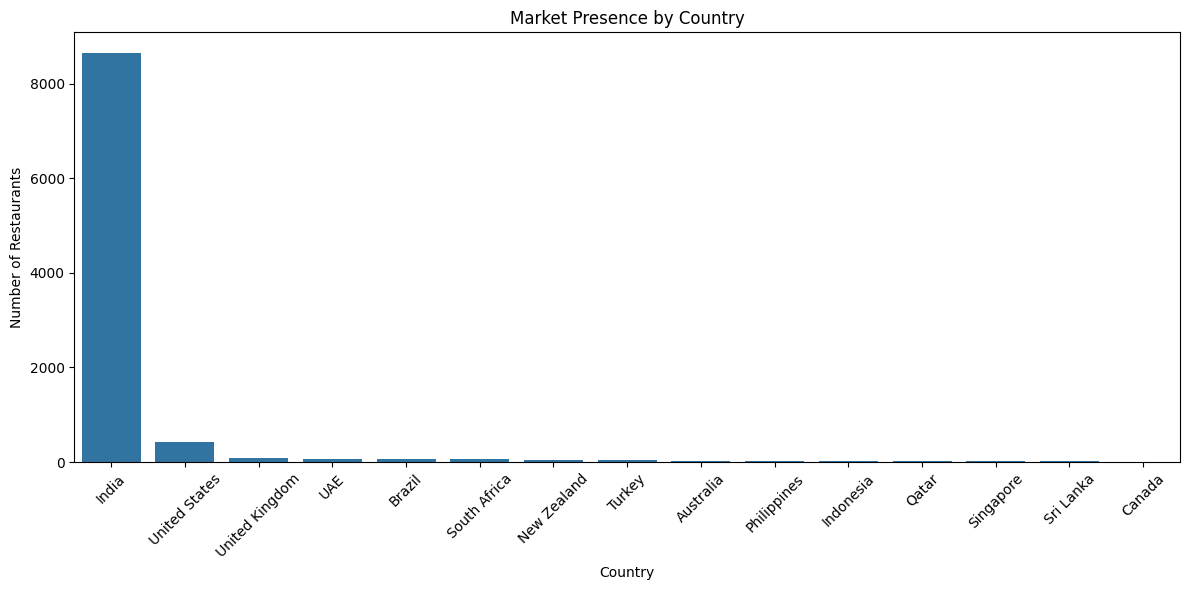

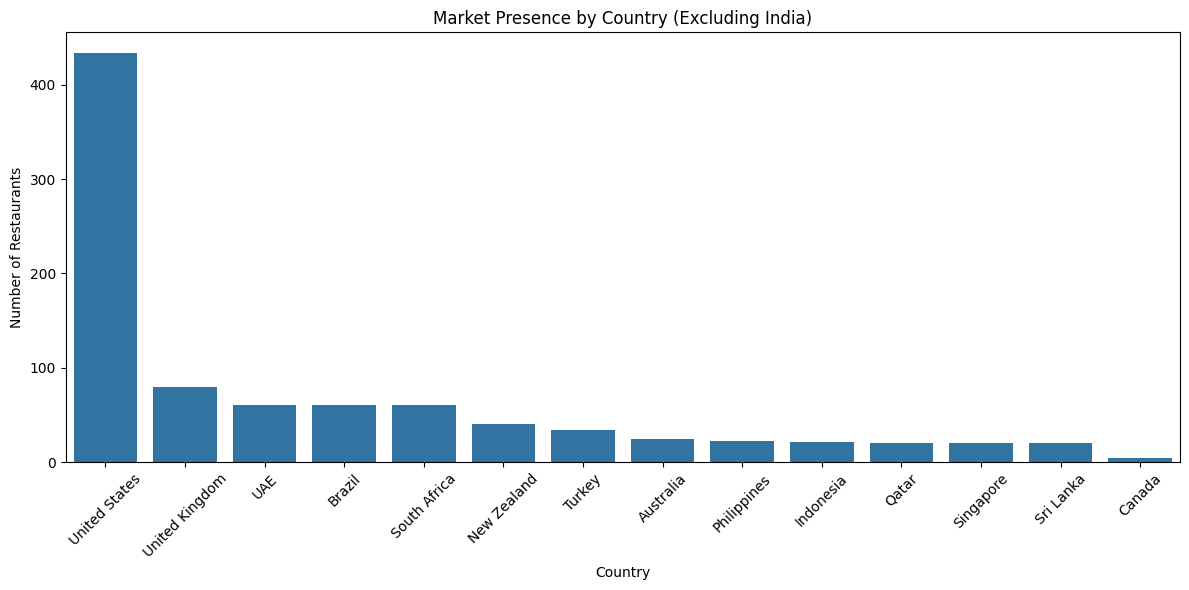

In [ ]:
plt.figure(figsize=(12, 6))

order = df['country_name'].value_counts().index
sns.countplot(
    data=df,
    x='country_name',
    order=order
)

plt.title('Market Presence by Country')
plt.xlabel('Country')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.figure(figsize=(12, 6))

country_counts = df['country_name'].value_counts()

sns.barplot(
    x=country_counts.index[1:],
    y=country_counts.values[1:]
)

plt.title('Market Presence by Country (Excluding India)')
plt.xlabel('Country')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



**Restaurant Openings by Year**

* Analysis Type: Temporal Analysis (Univariate Over Time)
* Visualization Type: Line Chart

**Explanation:**
This line chart shows the number of restaurant openings across different years. It helps identify market growth trends, periods of rapid expansion, or slowdowns in new restaurant entries, offering insight into how the restaurant market has evolved over time.

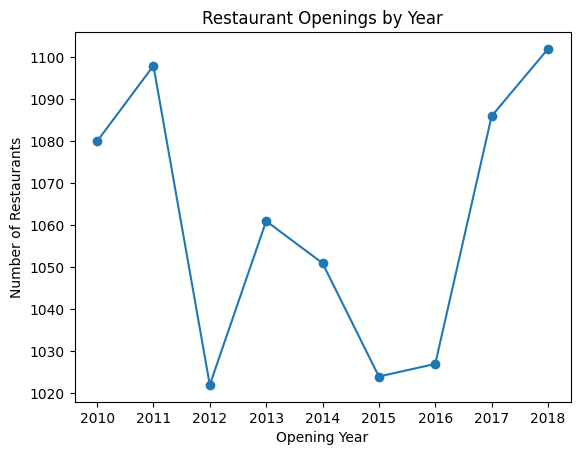

In [ ]:
openings = df.groupby('opening_year').size()

plt.plot(openings.index, openings.values, marker='o')
plt.title('Restaurant Openings by Year')
plt.xlabel('Opening Year')
plt.ylabel('Number of Restaurants')
plt.show()


**Online Delivery Availability**
* Analysis Type: Univariate Analysis
* Visualization Type: Pie Chart

**Explanation**:
This pie chart represents the proportion of restaurants that offer online delivery versus those that do not. It provides a quick overview of how widely online delivery services are adopted across restaurants in the dataset.

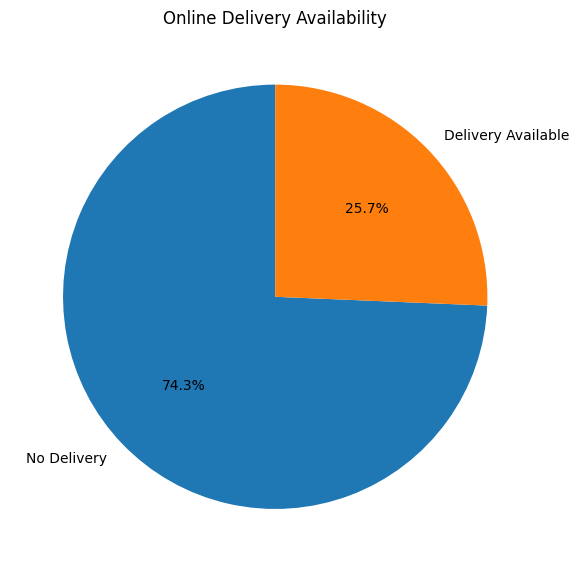

In [ ]:
plt.figure(figsize=(6, 6))

delivery_counts = df['online_delivery_flag'].value_counts().sort_index()

plt.pie(
    delivery_counts.values,
    labels=['No Delivery', 'Delivery Available'],
    autopct='%1.1f%%',
    startangle=90
)

plt.title('Online Delivery Availability')
plt.tight_layout()
plt.show()



**Distribution of Restaurant Ratings**

* Analysis Type: Univariate Analysis
* Visualization Type: Histogram (with KDE)

**Explanation:**
This histogram shows the distribution of restaurant ratings across the dataset. The Kernel Density Estimate (KDE) overlay helps visualize the overall rating pattern, indicating whether ratings are skewed, normally distributed, or concentrated within specific ranges.

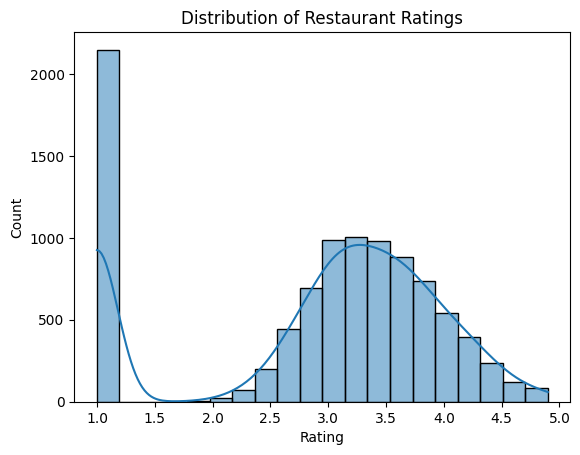

,rating,votes,average_cost_for_two,price_range,is_chain,service_score
rating,1.000000,0.349105,0.058957,0.462939,0.035982,0.269134
votes,0.349105,1.000000,0.067783,0.309444,0.034588,0.153654
average_cost_for_two,0.058957,0.067783,1.000000,0.075083,-0.014286,-0.010076
price_range,0.462939,0.309444,0.075083,1.000000,-0.057766,0.346454
is_chain,0.035982,0.034588,-0.014286,-0.057766,1.000000,0.121401
service_score,0.269134,0.153654,-0.010076,0.346454,0.121401,1.000000


In [ ]:
sns.histplot(df['rating'], bins=20, kde=True)
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


**Overall Customer Sentiment**

* Analysis Type: Univariate Analysis
* Visualization Type: Bar Chart

**Explanation:**
This bar chart displays the distribution of restaurants across different rating sentiment categories (such as positive, neutral, and negative). It helps assess the overall customer sentiment in the dataset and understand how restaurants are perceived based on their ratings.

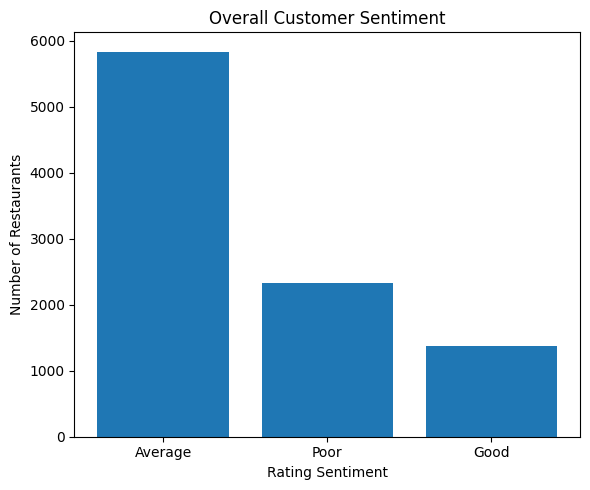

In [ ]:
plt.figure(figsize=(6, 5))

sentiment_counts = df['rating_sentiment'].value_counts()

plt.bar(sentiment_counts.index, sentiment_counts.values)

plt.title('Overall Customer Sentiment')
plt.xlabel('Rating Sentiment')
plt.ylabel('Number of Restaurants')
plt.tight_layout()
plt.show()


**Service Level vs Customer Sentiment**

* Analysis Type: Bivariate Analysis
* Visualization Type: Stacked Bar Chart

**Explanation:**
This stacked bar chart illustrates the relationship between service level and customer rating sentiment. It helps compare how different service levels are associated with positive, neutral, or negative customer sentiment, providing insight into whether better service levels correlate with improved customer perception.

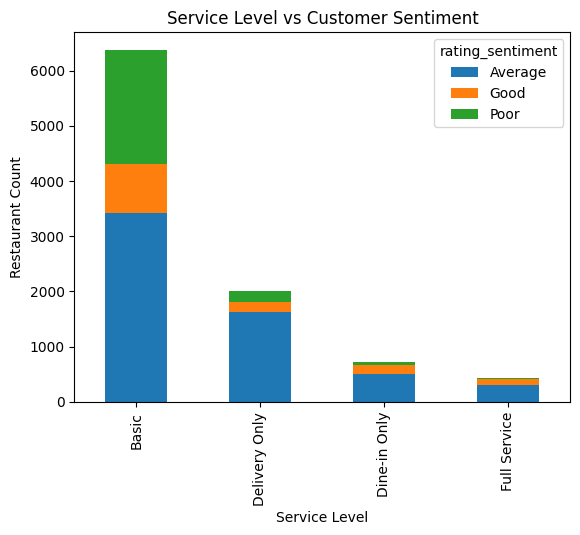

In [ ]:
pd.crosstab(df['service_level'], df['rating_sentiment']).plot(kind='bar', stacked=True)
plt.xlabel('Service Level')
plt.ylabel('Restaurant Count')
plt.title('Service Level vs Customer Sentiment')
plt.show()



**Impact of Online Delivery on Ratings**

* Analysis Type: Bivariate Analysis
* Visualization Type: Bar Chart (Mean Comparison)

**Explanation:**
This bar chart compares the average restaurant ratings between establishments that offer online delivery and those that do not. It helps evaluate whether the availability of online delivery has an influence on customer ratings and overall restaurant perception.

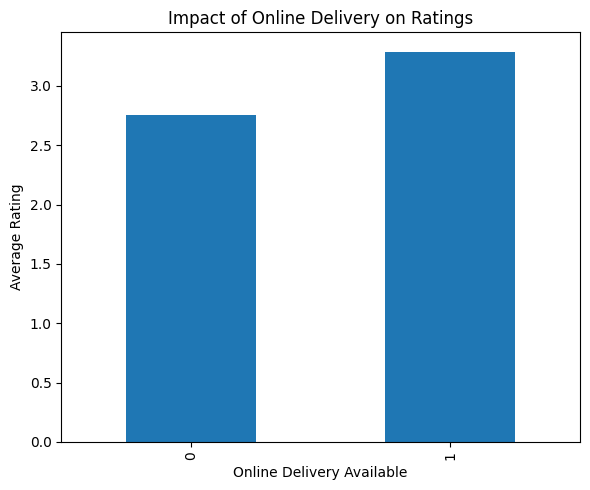

In [ ]:
plt.figure(figsize=(6, 5))

df.groupby('online_delivery_flag')['rating'].mean().plot(kind='bar')

plt.title('Impact of Online Delivery on Ratings')
plt.xlabel('Online Delivery Available')
plt.ylabel('Average Rating')
plt.tight_layout()
plt.show()


**Distribution of Average Cost for Two**

* Analysis Type: Univariate Analysis
* Visualization Type: Histogram (Log-Scaled)

**Explanation:**
This histogram shows the distribution of the average cost for two people using a logarithmic scale. Applying a log scale helps handle extreme values and reveals the underlying cost distribution more clearly, especially when the data is right-skewed due to high-end restaurants.

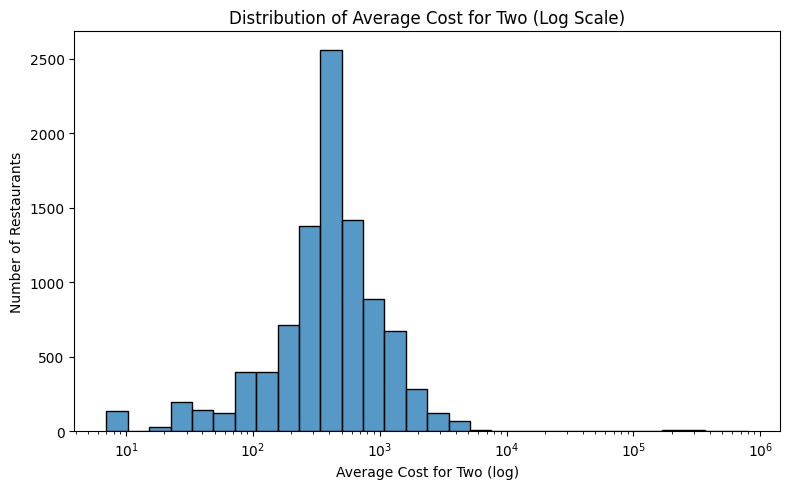

In [ ]:
plt.figure(figsize=(8, 5))

sns.histplot(
    df['average_cost_for_two'],
    bins=30,
    log_scale=True
)

plt.title('Distribution of Average Cost for Two (Log Scale)')
plt.xlabel('Average Cost for Two (log)')
plt.ylabel('Number of Restaurants')
plt.tight_layout()
plt.show()



**Rating Distribution Across Price Categories**

* Analysis Type: Bivariate Analysis
* Visualization Type: Box Plot

**Explanation:**
This box plot compares the distribution of restaurant ratings across different price categories (Budget, Mid-range, Premium, and Luxury). It highlights differences in median ratings, variability, and the presence of outliers, helping assess whether higher-priced restaurants tend to receive better customer ratings.

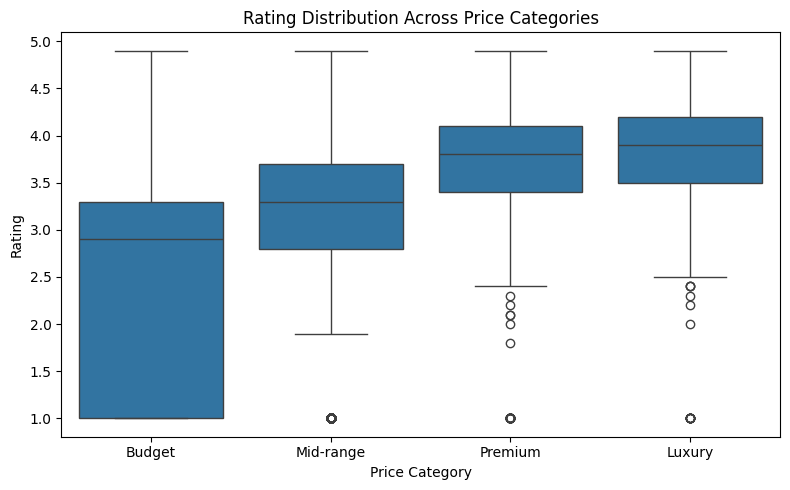

In [ ]:
plt.figure(figsize=(8, 5))

sns.boxplot(
    data=df,
    x='price_category',
    y='rating',
    order=['Budget', 'Mid-range', 'Premium', 'Luxury']
)

plt.title('Rating Distribution Across Price Categories')
plt.xlabel('Price Category')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()


**Average Rating by Price Category**

* Analysis Type: Bivariate Analysis
* Visualization Type: Bar Chart (Mean Comparison)

**Explanation:**
This bar chart shows the average restaurant rating for each price category. It helps compare customer satisfaction across different pricing segments and provides insight into whether higher-priced restaurants tend to achieve better average ratings than budget or mid-range options.

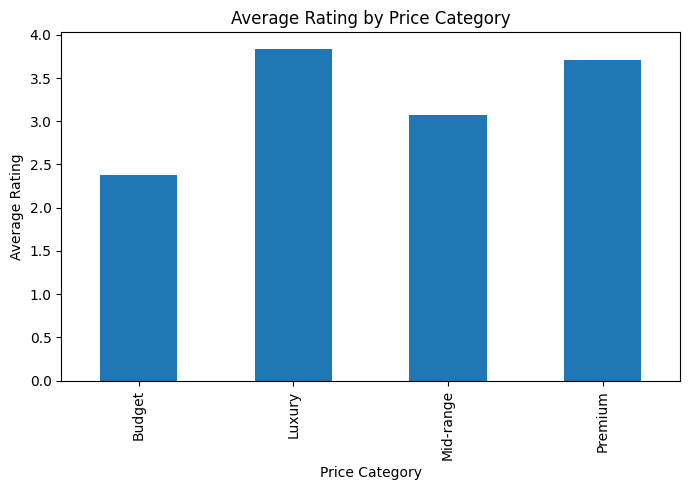

In [ ]:
plt.figure(figsize=(7, 5))

df.groupby('price_category')['rating'].mean().plot(kind='bar')

plt.title('Average Rating by Price Category')
plt.xlabel('Price Category')
plt.ylabel('Average Rating')
plt.tight_layout()
plt.show()


**Ratings by Cost Outlier Category**

* Analysis Type: Bivariate Analysis
* Visualization Type: Bar Chart (Mean Comparison)

**Explanation:**
This bar chart compares the average restaurant ratings across different cost outlier categories (such as low-cost, typical-cost, and high-cost outliers). It helps assess how pricing extremes relate to customer ratings and whether unusually priced restaurants tend to receive higher or lower ratings.

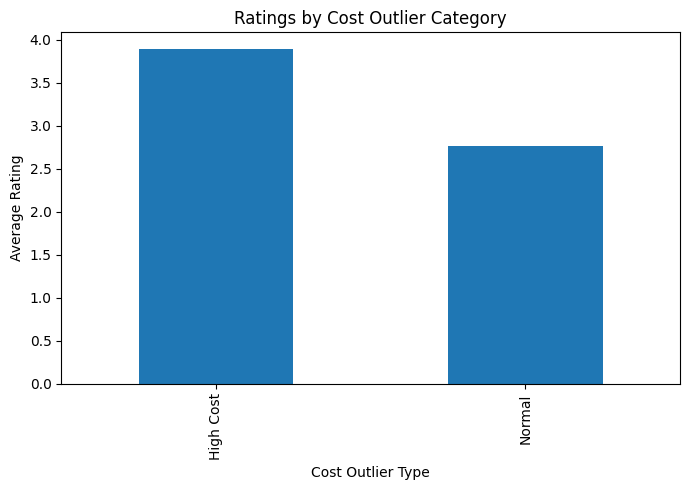

In [ ]:
plt.figure(figsize=(7, 5))

df.groupby('cost_outlier_type')['rating'].mean().plot(kind='bar')

plt.title('Ratings by Cost Outlier Category')
plt.xlabel('Cost Outlier Type')
plt.ylabel('Average Rating')
plt.tight_layout()
plt.show()


**Distribution of Customer Votes**

* Analysis Type: Univariate Analysis
* Visualization Type: Histogram (with KDE)

**Explanation:**
This histogram shows the distribution of customer votes received by restaurants. The KDE overlay helps identify the overall voting pattern, highlighting whether most restaurants receive low engagement or if a smaller number attract significantly higher customer interaction.

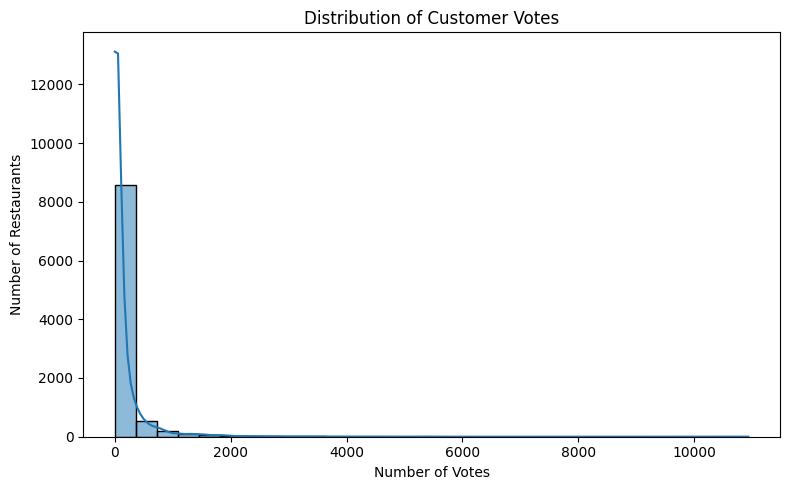

In [ ]:
plt.figure(figsize=(8, 5))

sns.histplot(df['votes'], bins=30, kde=True)

plt.title('Distribution of Customer Votes')
plt.xlabel('Number of Votes')
plt.ylabel('Number of Restaurants')
plt.tight_layout()
plt.show()


**Cuisine Variety vs Average Rating**
* Analysis Type: Bivariate Analysis
* Visualization Type: Line Chart

**Explanation:**
This line chart illustrates how the average restaurant rating changes with the number of cuisines offered. It helps evaluate whether increasing menu variety is associated with higher customer satisfaction or if there is an optimal cuisine count beyond which ratings plateau or decline.

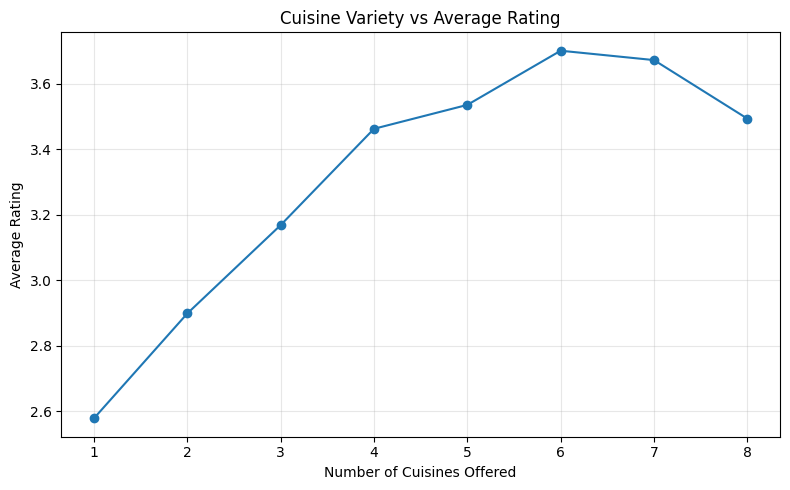

In [ ]:
plt.figure(figsize=(8, 5))

df.groupby('cuisine_count')['rating'].mean().plot(marker='o')

plt.title('Cuisine Variety vs Average Rating')
plt.xlabel('Number of Cuisines Offered')
plt.ylabel('Average Rating')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


**Top 10 Cities by Average Restaurant Rating**

* Analysis Type: Bivariate Analysis (Location vs Rating)
* Visualization Type: Bar Chart (Mean Comparison)

**Explanation:**
This bar chart highlights the top 10 cities based on average restaurant ratings. It helps identify cities where restaurants tend to receive higher customer satisfaction, offering insights into regional quality trends rather than sheer restaurant density.

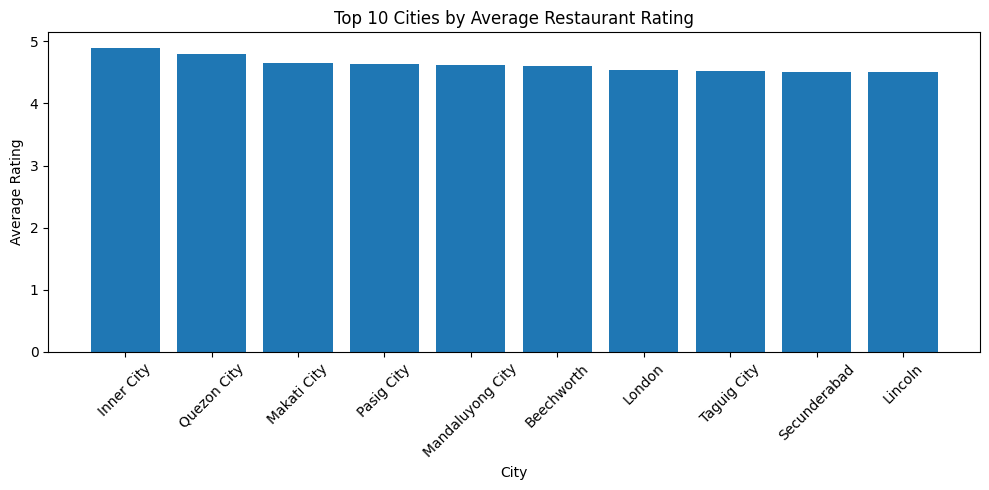

In [ ]:
top_cities = (
    df.groupby('city')['rating']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10, 5))
plt.bar(top_cities.index, top_cities.values)

plt.title('Top 10 Cities by Average Restaurant Rating')
plt.xlabel('City')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Top 10 Cities by Number of Restaurants**

* Analysis Type: Univariate Analysis (Ranking / Frequency Analysis)
* Visualization Type: Bar Chart

**Explanation:**
This bar chart shows the top 10 cities with the highest number of restaurants in the dataset. It highlights major urban centers with dense restaurant presence and helps identify key geographic markets where competition and customer choice are highest.

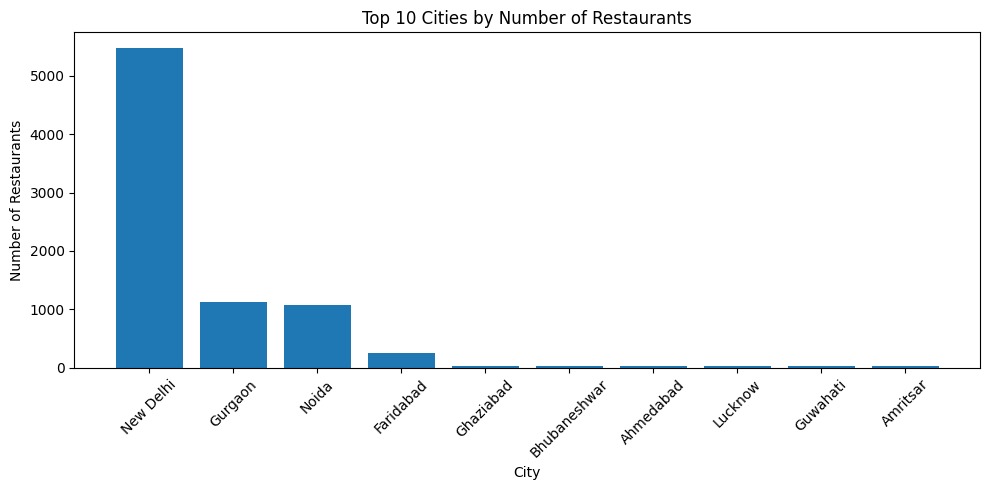

In [ ]:
plt.figure(figsize=(10, 5))

top_cities = df['city'].value_counts().head(10)

plt.bar(top_cities.index, top_cities.values)

plt.title('Top 10 Cities by Number of Restaurants')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Cuisine Positioning: Cost vs Quality**

* Analysis Type: Multivariate Analysis
* Visualization Type: Bubble Chart (Scatter Plot with Size Encoding)

**Explanation:**
This bubble chart positions different cuisines based on their average cost (x-axis) and average rating (y-axis), with bubble size representing the number of restaurants offering each cuisine. The reference lines indicate overall average cost and rating, dividing the chart into performance quadrants. This visualization helps identify cuisines that offer high quality at lower cost, premium high-quality cuisines, and those that underperform relative to pricing.

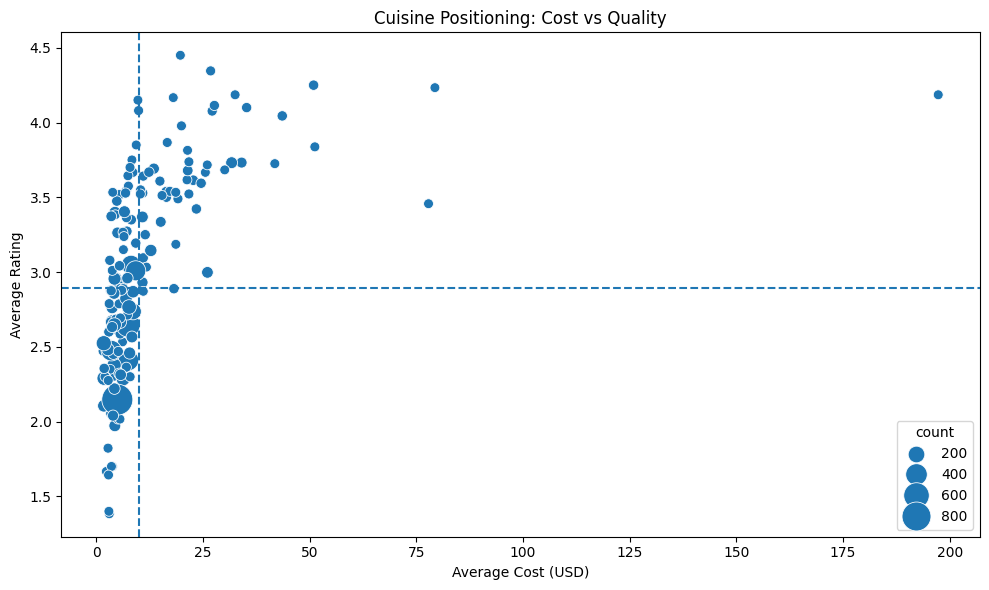

In [ ]:
cuisine_stats = (
    df.groupby('cuisines')
    .agg(
        avg_rating=('rating', 'mean'),
        avg_cost=('average_cost_usd', 'mean'),
        count=('restaurantid', 'count')
    )
)

cuisine_stats = cuisine_stats[cuisine_stats['count'] > 5]

plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=cuisine_stats,
    x='avg_cost',
    y='avg_rating',
    size='count',
    sizes=(50, 500)
)

plt.axhline(df['rating'].mean(), linestyle='--')
plt.axvline(df['average_cost_usd'].mean(), linestyle='--')

plt.title('Cuisine Positioning: Cost vs Quality')
plt.xlabel('Average Cost (USD)')
plt.ylabel('Average Rating')
plt.tight_layout()
plt.show()


**Correlation Heatmap of Numerical Features**

* Analysis Type: Multivariate Analysis
* Visualization Type: Heatmap (Correlation Matrix)

**Explanation:**
This heatmap displays the pairwise correlation between key numerical features such as ratings, votes, cost metrics, and cuisine count. It helps identify the strength and direction of relationships between variables, highlighting potential associations (e.g., engagement vs quality or cost vs rating) and aiding in feature understanding for further analysis or modeling.

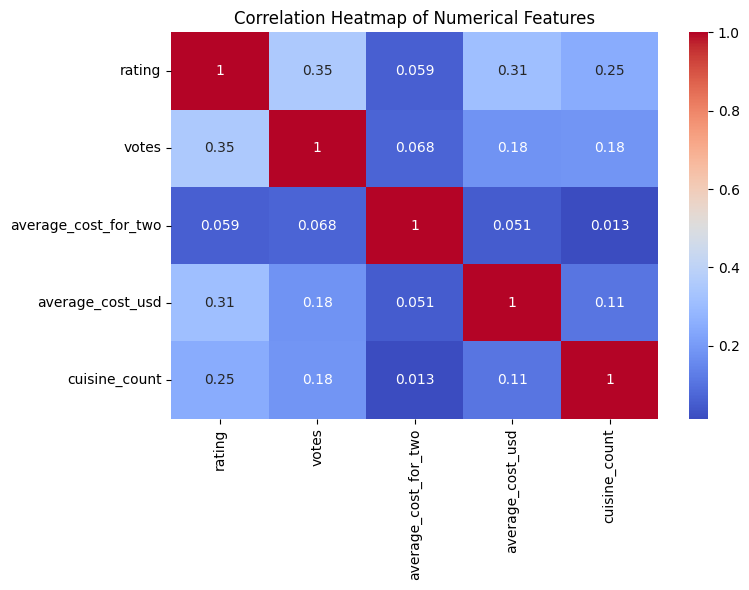

In [ ]:
num_cols = [
    'rating',
    'votes',
    'average_cost_for_two',
    'average_cost_usd',
    'cuisine_count'
]

plt.figure(figsize=(8, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()


**Customer Rating Analysis**
* Analysis Type: Multivariate Analysis
* Visualization Type: Composite Visualization
(Histogram, Box Plot, Bar Chart)

**Explanation:**

This figure analyzes restaurant ratings from multiple perspectives to understand overall quality and influencing factors:

Rating Distribution (Histogram)
Shows how restaurant ratings are distributed across the dataset, indicating common rating ranges and overall quality trends.

Rating vs Price Category (Box Plot)
Compares rating distributions across different price segments, highlighting differences in median ratings, spread, and outliers to assess value perception.

Impact of Online Delivery on Ratings (Bar Chart)
Compares average ratings between restaurants that offer online delivery and those that do not, helping evaluate whether delivery availability influences customer satisfaction.

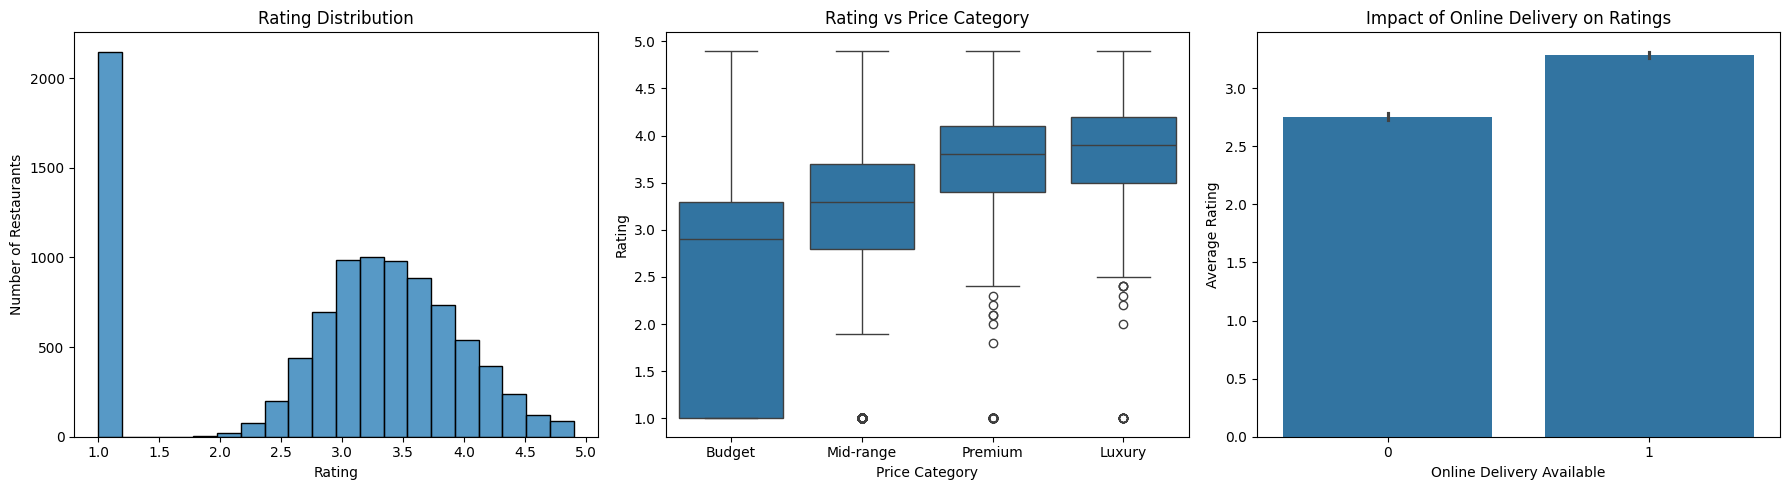

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Rating Distribution
sns.histplot(df['rating'], bins=20, ax=axes[0])
axes[0].set_title('Rating Distribution')
axes[0].set_xlabel('Rating')
axes[0].set_ylabel('Number of Restaurants')

# 2. Rating by Price Category
sns.boxplot(
    data=df,
    x='price_category',
    y='rating',
    ax=axes[1]
)
axes[1].set_title('Rating vs Price Category')
axes[1].set_xlabel('Price Category')
axes[1].set_ylabel('Rating')

# 3. Delivery Impact on Rating
sns.barplot(
    data=df,
    x='online_delivery_flag',
    y='rating',
    ax=axes[2]
)
axes[2].set_title('Impact of Online Delivery on Ratings')
axes[2].set_xlabel('Online Delivery Available')
axes[2].set_ylabel('Average Rating')

plt.tight_layout()
plt.show()


**Global Market & Pricing Overview**

* Analysis Type: Multivariate Exploratory Data Analysis
* Visualization Type: Composite Dashboard
(Bar Chart, Pie Chart, Box Plot)

**Explanation:**

This 2×2 dashboard provides a high-level overview of the global restaurant landscape across geography, customer perception, pricing, and value:

Market Presence by Country (Bar Chart)
Shows the distribution of restaurants across countries, highlighting regions with the strongest market penetration and overall dataset concentration.

Global Sentiment Composition (Pie Chart)
Illustrates the proportion of restaurants across different rating sentiment categories, offering a snapshot of overall customer satisfaction worldwide.

Value-for-Money: Rating Variance by Price (Box Plot)
Compares rating distributions across price categories, revealing how customer satisfaction varies with pricing and identifying categories with consistent or volatile ratings.

Economic Landscape: Average Cost per Country (Bar Chart)
Displays the average cost for two (in USD) across countries, helping compare relative pricing levels and understand economic positioning of different markets.

/tmp/ipython-input-2630057296.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='country_name', ax=axes[0, 0], order=order, palette='viridis')
/tmp/ipython-input-2630057296.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='price_category', y='rating', order=price_order, ax=axes[1, 0], palette='Set2')
/tmp/ipython-input-2630057296.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cost_data.index, y=cost_data.values, ax=axes[1, 1], palette='magma')


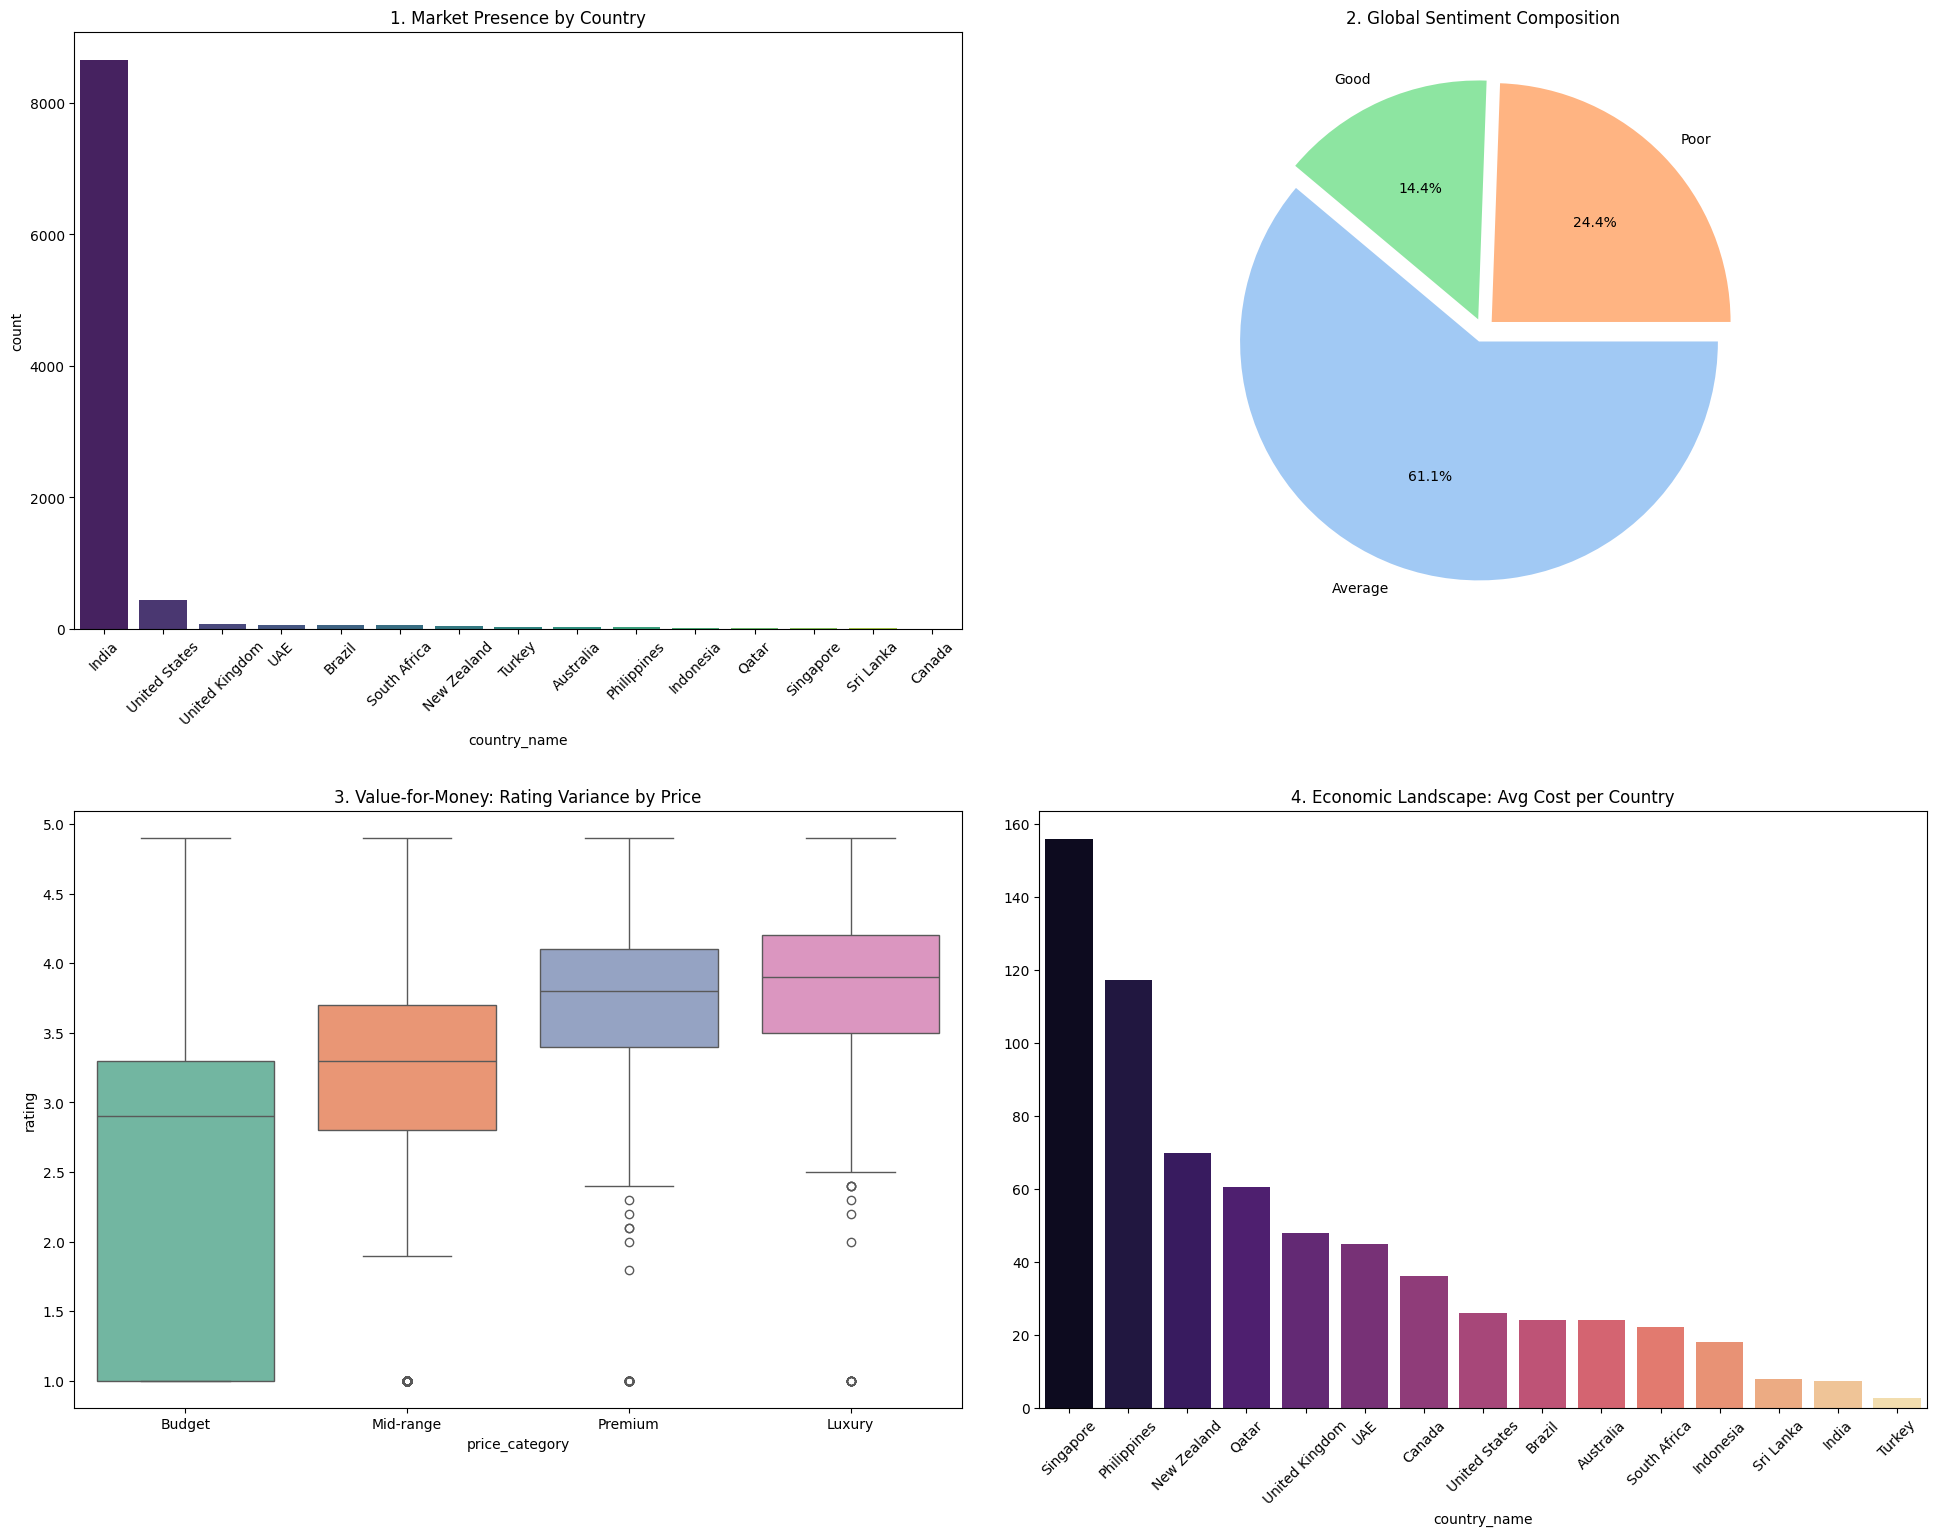

In [ ]:
# Create a 2x2 Subplot Layout
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

# 1. Restaurant Distribution by Country (Bar)
order = df['country_name'].value_counts().index
sns.countplot(data=df, x='country_name', ax=axes[0, 0], order=order, palette='viridis')
axes[0, 0].set_title('1. Market Presence by Country')
axes[0, 0].tick_params(axis='x', rotation=45)

# 2. Rating Sentiment Breakdown (Pie)
sentiment_data = df['rating_sentiment'].value_counts()
axes[0, 1].pie(sentiment_data, labels=sentiment_data.index, autopct='%1.1f%%',
              startangle=140, colors=sns.color_palette('pastel'), explode=[0.05]*len(sentiment_data))
axes[0, 1].set_title('2. Global Sentiment Composition')

# 3. Rating Spread by Price Category (Box Plot)
price_order = ['Budget', 'Mid-range', 'Premium', 'Luxury']
sns.boxplot(data=df, x='price_category', y='rating', order=price_order, ax=axes[1, 0], palette='Set2')
axes[1, 0].set_title('3. Value-for-Money: Rating Variance by Price')

# 4. Average Cost (USD) per Country (Bar)
cost_data = df.groupby('country_name')['average_cost_usd'].mean().sort_values(ascending=False)
sns.barplot(x=cost_data.index, y=cost_data.values, ax=axes[1, 1], palette='magma')
axes[1, 1].set_title('4. Economic Landscape: Avg Cost per Country')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout(pad=3.0)
plt.show()

**Advanced Market & Service Insights**

* Analysis Type: Multivariate Analysis
* Visualization Type: Composite Visualization
(Heatmap, Line Chart, Point Plot, Histogram)

**Explanation:**

This figure provides deeper insights into service offerings, market growth, cuisine diversity, and customer engagement:

Service Interdependence: Delivery vs Table Booking (Heatmap)
Displays the relationship between online delivery and table booking availability. It helps determine whether restaurants offering one service are more likely to offer the other.

Market Expansion Trend (Line Chart)
Illustrates the number of restaurant openings over time, highlighting growth phases, peak expansion periods, or stagnation in market entry.

Cuisine Count vs Average Rating (Point Plot)
Examines how cuisine diversity impacts customer ratings. This visualization helps identify an optimal number of cuisines (“sweet spot”) that balances variety and quality.

Engagement Density: Distribution of Votes (Histogram)
Shows how customer engagement is distributed across restaurants, indicating whether engagement is widespread or concentrated among a smaller subset.

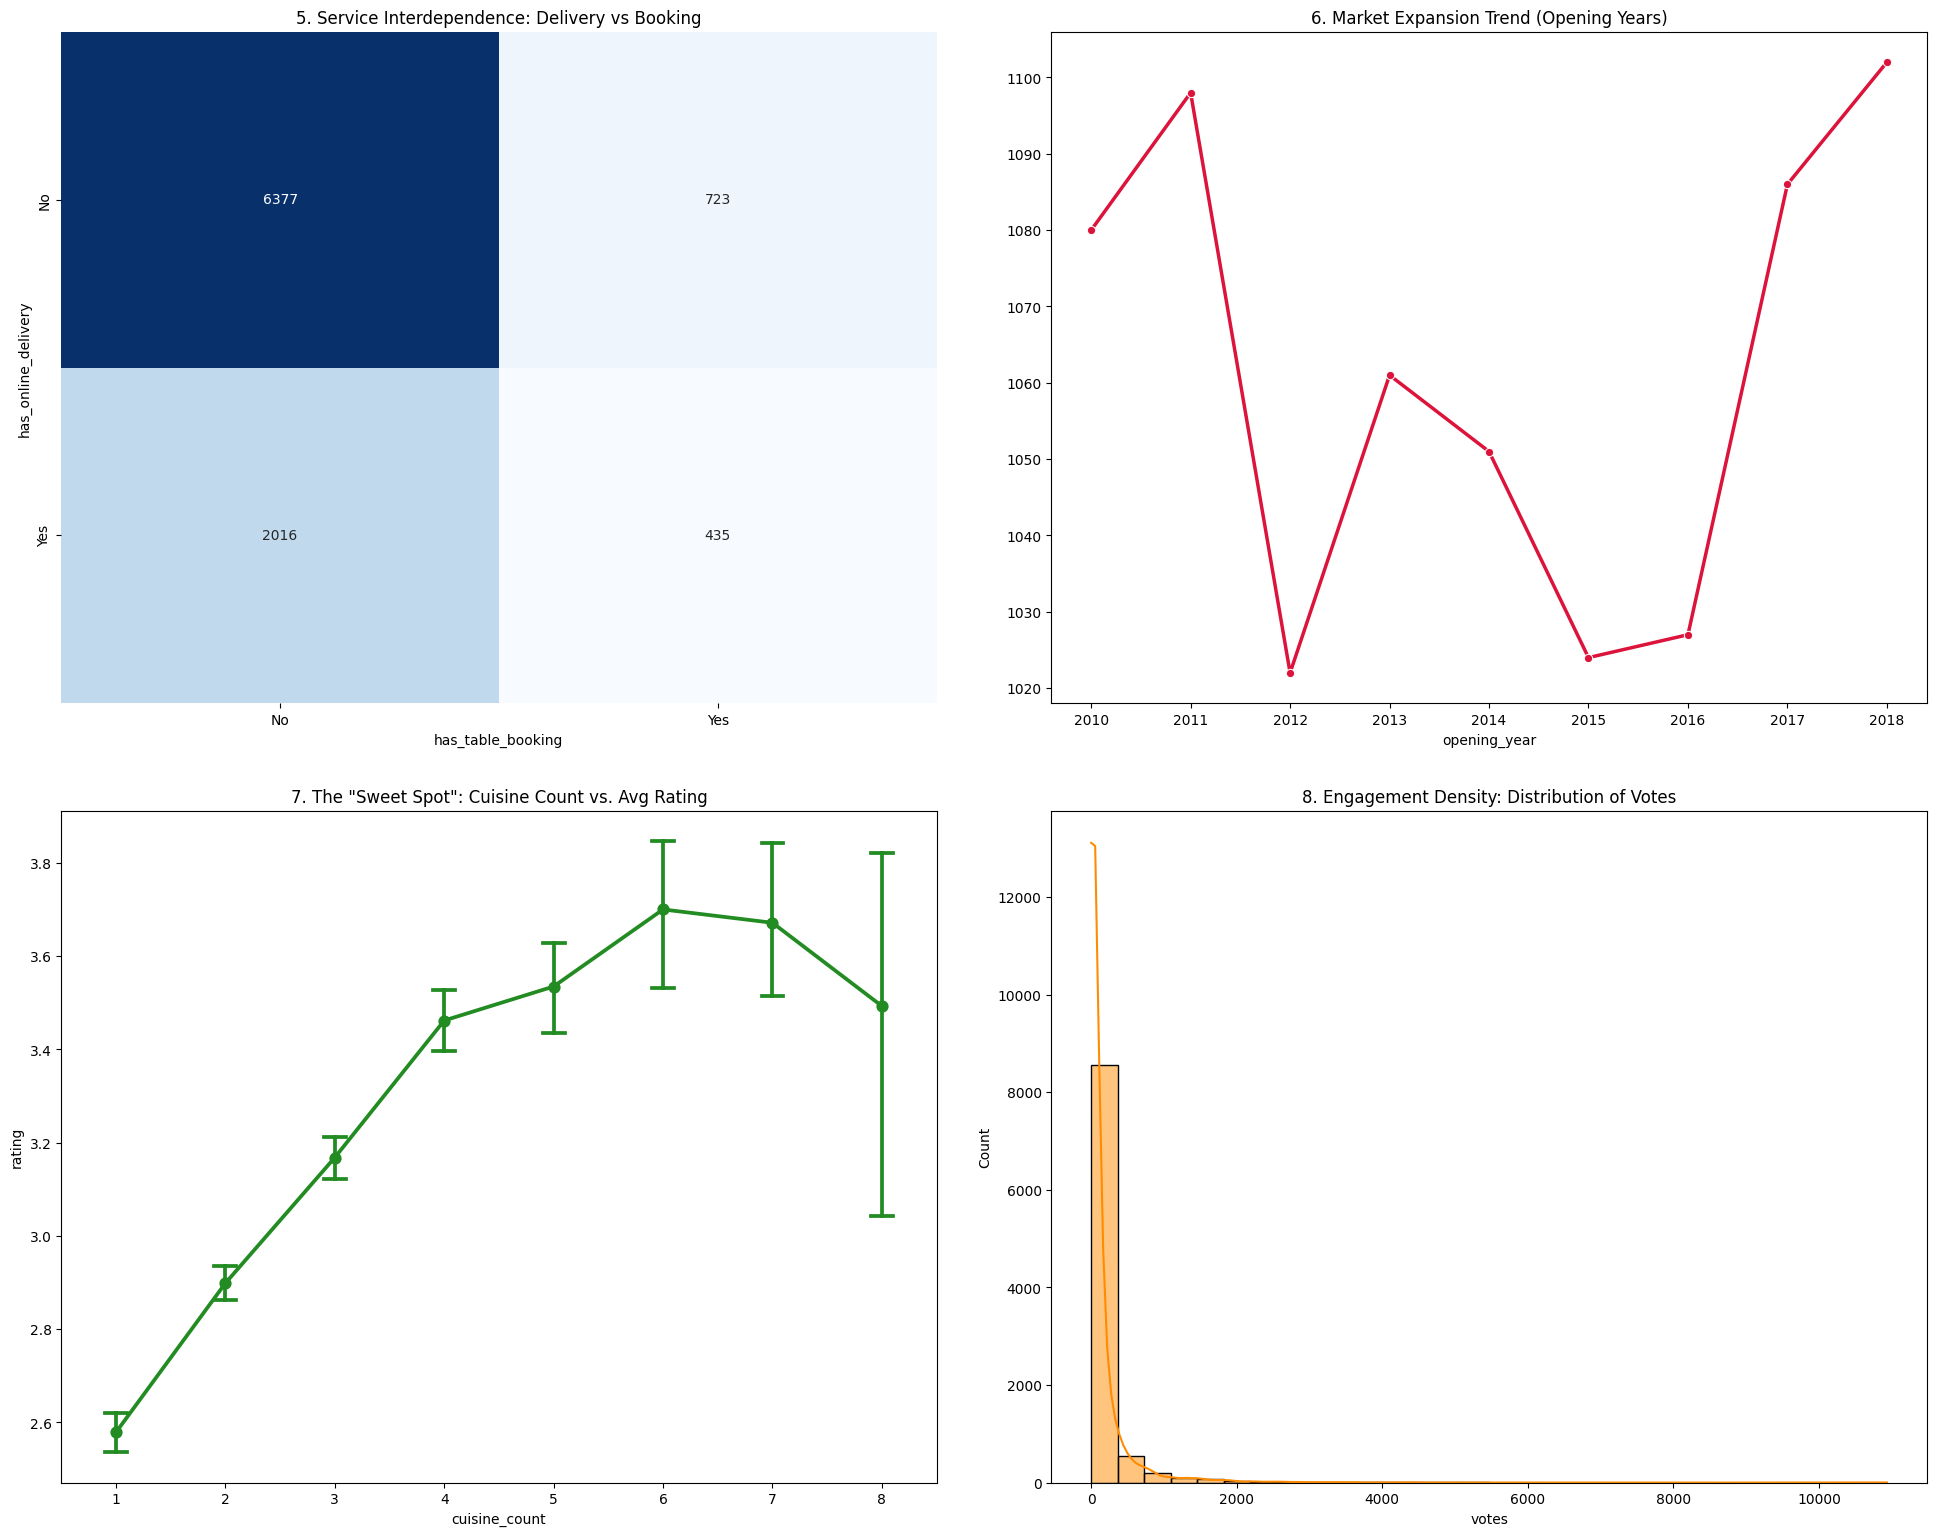

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

# 5. Online Delivery vs. Table Booking (Heatmap)
cross_tab = pd.crosstab(df['has_online_delivery'], df['has_table_booking'])
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0], cbar=False)
axes[0, 0].set_title('5. Service Interdependence: Delivery vs Booking')

# 6. Growth Trend: Openings Over Time (Line)
growth = df['opening_year'].value_counts().sort_index()
sns.lineplot(x=growth.index, y=growth.values, ax=axes[0, 1], marker='o', color='crimson', linewidth=2.5)
axes[0, 1].set_title('6. Market Expansion Trend (Opening Years)')

# 7. Cuisine Diversity Impact (Point Plot)
sns.pointplot(data=df, x='cuisine_count', y='rating', ax=axes[1, 0], color='forestgreen', capsize=.2)
axes[1, 0].set_title('7. The "Sweet Spot": Cuisine Count vs. Avg Rating')

# 8. Customer Engagement Density (Histogram/KDE)
sns.histplot(df['votes'], kde=True, ax=axes[1, 1], color='darkorange', bins=30)
axes[1, 1].set_title('8. Engagement Density: Distribution of Votes')

plt.tight_layout(pad=3.0)
plt.show()

## **Summary**
### **Major Insights from the Analysis**
#### **Insight 1: Market Dominance and Global Distribution**
India is the primary market with over 8,000 restaurants, while the United States leads a significantly smaller international tier. Excluding India from the data was essential to visualize the remaining global distribution, which ranges from major hubs like the UK and UAE to niche markets like Canada.


#### **Insight 2: Trends in Restaurant Openings and Market Recovery**

The number of restaurant openings varies across years, with a decline around 2012 and steady recovery afterward. From 2016 onwards, there is a clear increase in new restaurant openings, indicating growing market expansion and increased business activity.
#### **Insight 3: Service Quality and Customer Sentiment**
Restaurants that provide more services generally receive better customer sentiment. Basic service restaurants have more poor ratings, while full-service restaurants tend to receive more positive feedback. This suggests that better service options lead to higher customer satisfaction.
#### **Insight 4: Correlation Between Pricing and Customer Ratings**
Customer ratings tend to improve as price category increases. Budget restaurants show more variability in ratings, while premium and luxury restaurants provide more consistent and higher-rated experiences. However, paying more does not guarantee a perfect rating.
#### **Insight 5: Pricing Models as Indicators of Quality and Affordability**
Customers pay more not just for food, but for consistency and reliability. Premium pricing is associated with predictable quality, while budget options vary widely. Additionally, restaurant affordability differs greatly across countries due to economic factors.
#### **Insight 6: Drivers of Customer Satisfaction Beyond Price**
The correlation analysis shows that customer ratings are influenced more by popularity (number of votes) and menu variety than by price. Restaurant cost has very little impact on ratings, suggesting that customers value experience and quality over how expensive a restaurant is.


### **Conclusion**
* The global restaurant dataset is heavily dominated by India, making data * filtering essential for fair international comparison.

* Among international markets, the United States and United Kingdom show the strongest restaurant presence outside India.

* Restaurant openings declined around 2012 but have shown steady recovery and expansion from 2016 onward.

* Urban and metropolitan regions act as major hubs for restaurant concentration and business activity.

* Restaurants offering a wider range of services generally receive higher customer ratings and better sentiment.

* Premium and luxury restaurants provide more consistent dining experiences compared to budget restaurants.

* Budget restaurants show greater variability in customer ratings, indicating inconsistent service and quality.

* Customer ratings are influenced more by restaurant popularity and engagement (votes) than by pricing alone.

* Menu variety plays a significant role in shaping customer satisfaction across all price categories.

* Average dining costs vary significantly across countries due to economic conditions and local affordability rather than quality differences.